In [1]:
import CalcLoadPlotData as clp
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm

In [2]:
yr_to_sec = 60 * 60 * 24 * 365
sec_to_yr = 1 / yr_to_sec
cm_to_km = 1 / 1e5
cm_to_pc = 1 / 3.085678e18

#for temperature calculation:
kB_SI = 1.38e-23 #J/K
kB_cgs = kB_SI * 1e7
X_H = 0.76 # hydrogen mass fraction
gamma = 5/3
m_p = 1.67e-24 # proton mass in g


UnitVelocity_in_cm_per_s = 1e5		
UnitVelocity_in_km_per_s = UnitVelocity_in_cm_per_s / 1e5
UnitLength_in_cm = 3.085678e18 	# pc
UnitLength_in_pc = UnitLength_in_cm / 3.085678e18
UnitMass_in_g = 1.989e31		# 0.01 solar masses
UnitMass_in_Msun = UnitMass_in_g / 1.989e33

UnitEnergy_in_erg = UnitMass_in_g * UnitVelocity_in_cm_per_s**2
UnitTime_in_s = UnitLength_in_cm / UnitVelocity_in_cm_per_s
UnitTime_in_yr = UnitTime_in_s * sec_to_yr

In [8]:
folderPath = "/vera/ptmp/gc/xboecker/run/5_SN_cluster_final/"
folderNames = ["0_base_with_IO_fields", "1_density_0_5", "1_density_10",  "2_stars_5", "2_stars_100", "3_rad_5pc", "3_rad_40pc", "4_tempRad_5kyr", "4_tempRad_50kyr"]
folderNames = ["2_stars_1"]


folderPath = "/vera/ptmp/gc/xboecker/run/2_new_create/"
folderNames = ["28_1_2_n0_100"]


#folderPath = "/u/xboecker/run/3_multiple_SNe/"
#folderNames = ["0_1_star", "1_stars_10_linear_spacial_distribution_rad_10", "2_stars_10_linear_temporal_distribution_temp_5kyr", "3_stars_10_linear_spacial_and_temporal_distribution_rad_10pc_temp_5kyr"]
dataFolders = np.full(len(folderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")

for i in range(len(folderNames)):
    dataFolders[i] = folderPath+folderNames[i]+"/output"
    

boxSize = 96
frameAmount = 40
frameNbrMultiplier = 1
TimeBetSnapshot_in_unit_time = 0.002

In [9]:
clp.GetUnitSystem()
clp.SetUnitSystem(UnitVelocity_in_cm_per_s,UnitLength_in_cm,UnitMass_in_g)
clp.GetUnitSystem()
print("\n")
clp.GetParameters()
clp.SetParameters(boxSize, frameAmount, frameNbrMultiplier, TimeBetSnapshot_in_unit_time)
clp.GetParameters()

UnitVelocity_in_cm_per_s = 100000.0 
UnitLength_in_cm = 3.085678e+18 
UnitMass_in_g = 1.989e+31
UnitVelocity_in_cm_per_s = 100000.0 
UnitLength_in_cm = 3.085678e+18 
UnitMass_in_g = 1.989e+31


boxSize = 96 
frameAmount = 40 
frameNbrMultiplier = 10 
TimeBetSnapshot_in_unit_time = 0.002
boxSize = 96 
frameAmount = 40 
frameNbrMultiplier = 1 
TimeBetSnapshot_in_unit_time = 0.002


### SNR Radius

recalculate data


39

[-2.70842601 -2.70842601 -2.40739601 -2.23130475 -2.10636602 -2.009456
 -1.93027476 -1.86332797 -1.80533602 -1.7541835  -1.70842601 -1.66703332
 -1.62924476 -1.59448265 -1.56229797 -1.53233475 -1.50430602 -1.47797709
 -1.4531535  -1.42967241 -1.40739601 -1.38620671 -1.36600333 -1.34669817
 -1.32821477 -1.310486   -1.29345266 -1.27706224 -1.26126798 -1.24602801
 -1.23130475 -1.21706431 -1.20327603 -1.18991207 -1.17694709 -1.16435796
 -1.15212351 -1.14022428 -1.12864241 -1.1173614 ]


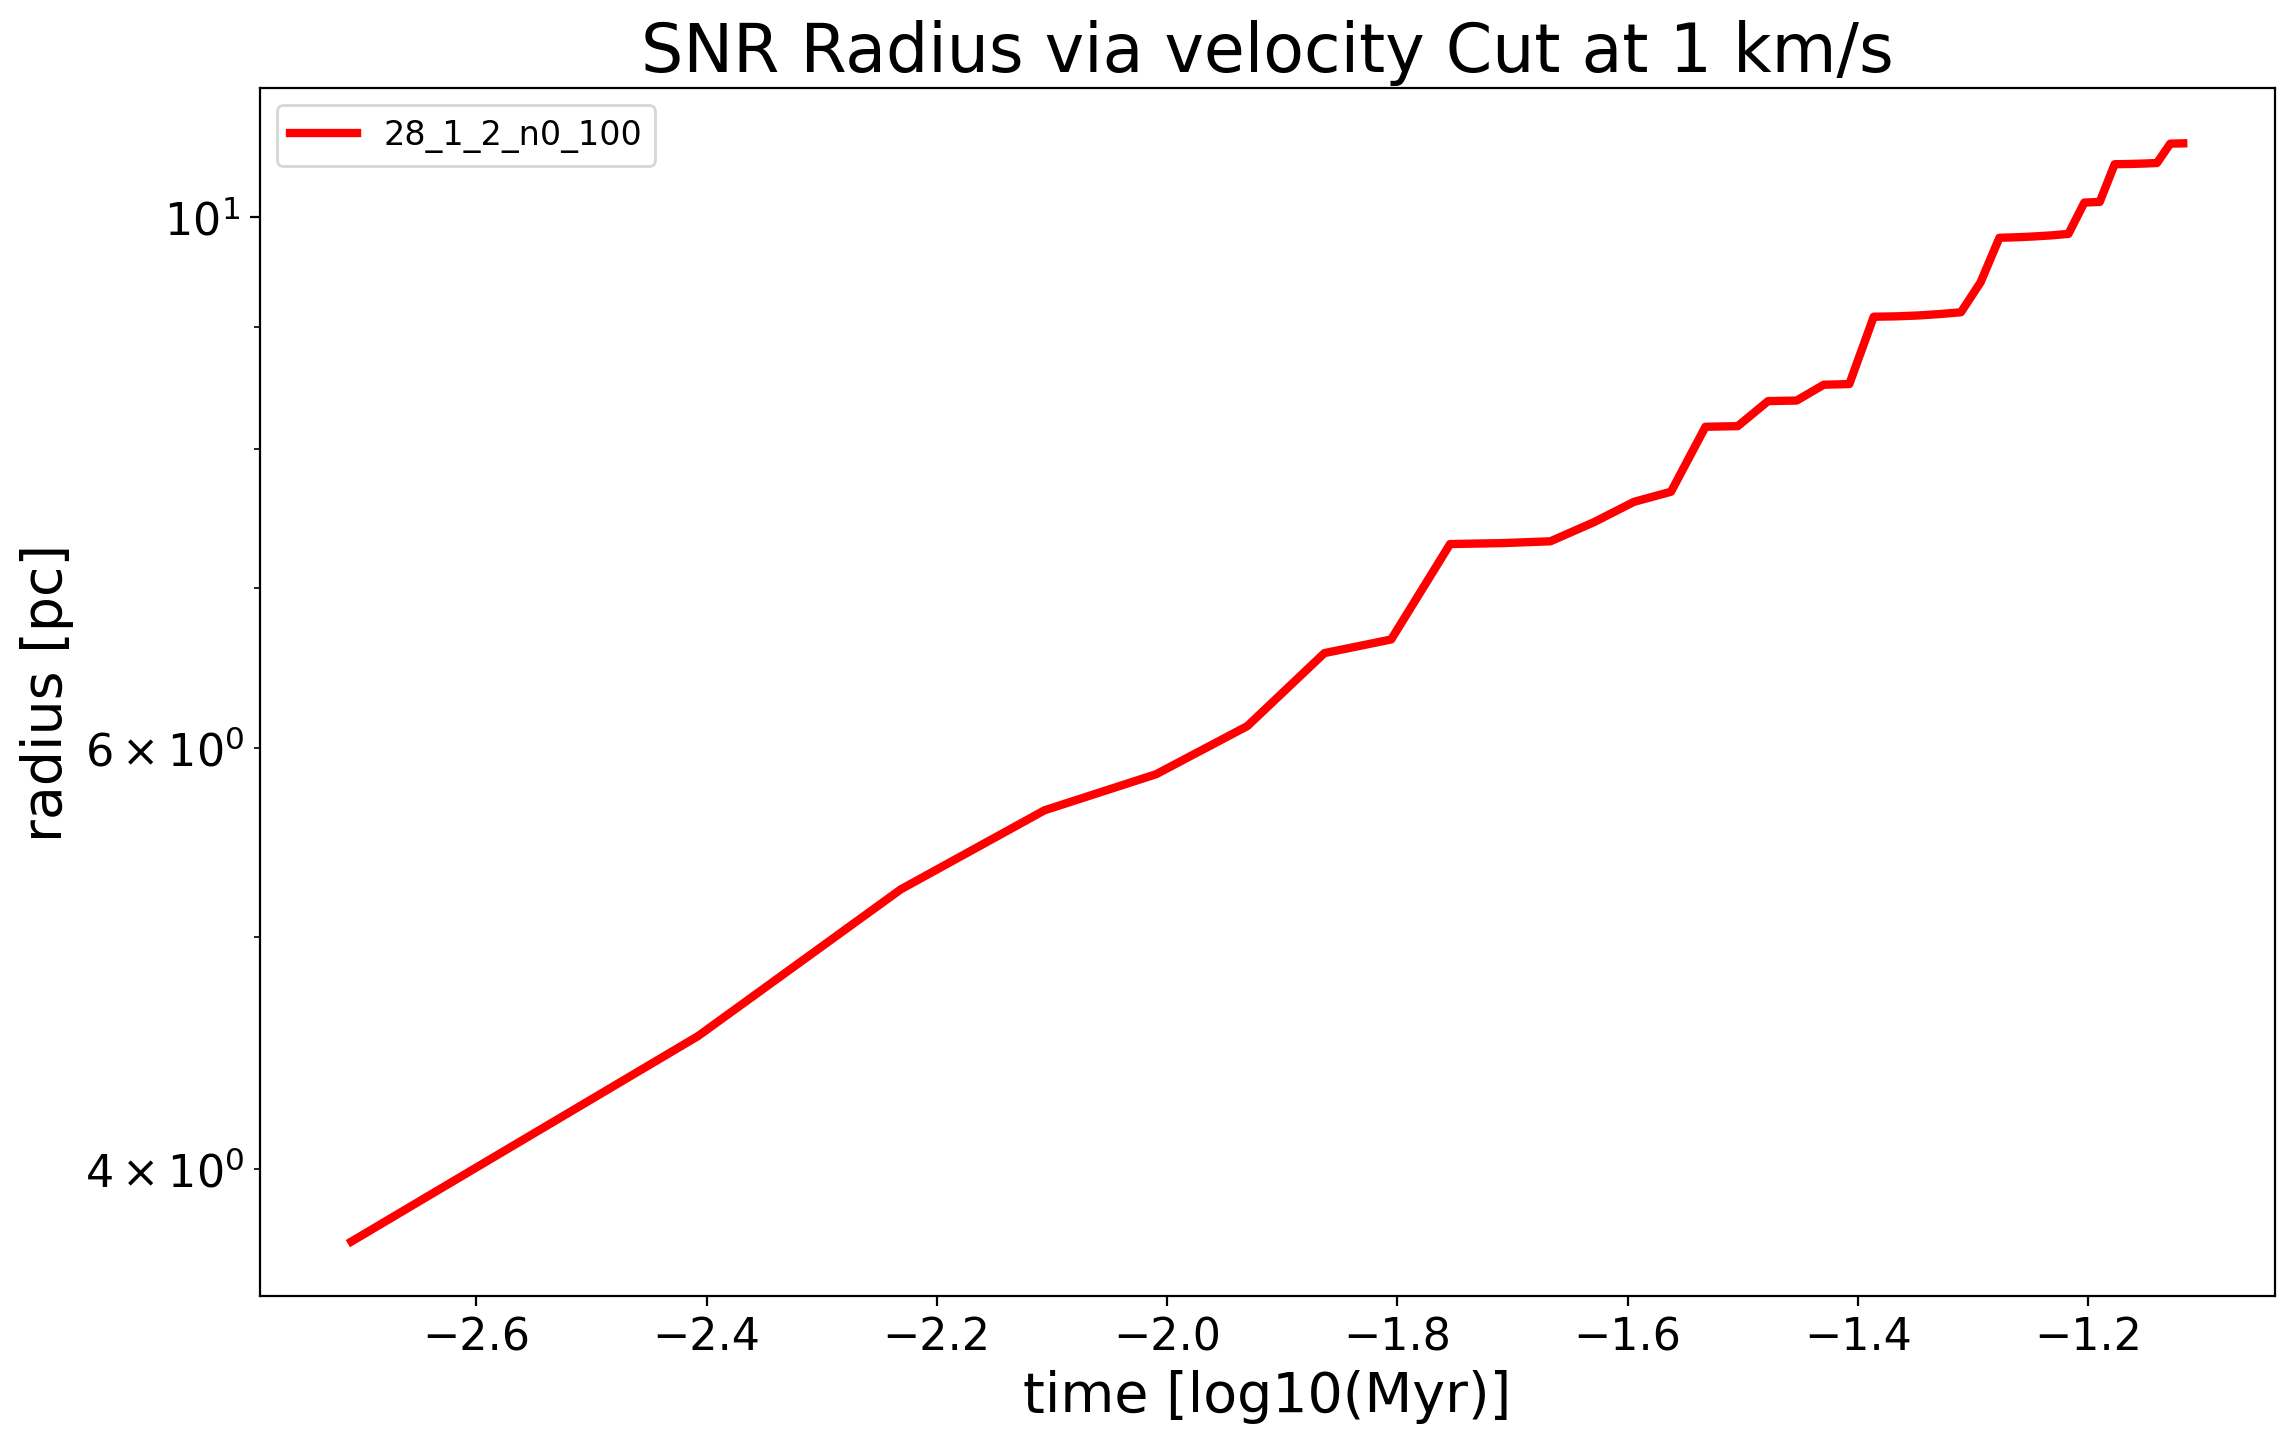

In [10]:
radiiArray = np.full(((len(folderNames)), frameAmount), 0, dtype = np.float64)

for i in range(len(radiiArray)):
    radiiArray[i] = clp.calculateOrLoadData(folder = dataFolders[i], 
                                        folderName = folderNames[i], 
                                        dataName = "velocityCutRadii", 
                                        calcDataOfOneSnapShotFunction = clp.velocityCutRadius,
                                        frameAmount = frameAmount, 
                                        recalculate = False)




clp.PlotData(data = radiiArray, 
         folderNames = folderNames, 
         title = "SNR Radius via velocity Cut at 1 km/s", 
         ylabel = "radius [pc]", 
         dataName = "velocityCutRadii", 
         unit_conversion_factor = 1,
         frameAmount = frameAmount, 
         frameNbrMultiplier = frameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         xScaleLog = True,
         compareToAnalyticRadius = False)


### Total Momentum

In [21]:
import scipy.optimize
import matplotlib.pyplot as plt

def func(x, p1, p2, p3):
    return p1 - p2 * np.exp(-p3 * x)

[ 19569.24150178  39138.48300355  58707.72450533  78276.9660071
  97846.20750888 117415.44901065 136984.69051243 156553.93201421
 176123.17351598 195692.41501776 215261.65651953 234830.89802131
 254400.13952308 273969.38102486 293538.62252664 313107.86402841
 332677.10553019 352246.34703196 371815.58853374 391384.83003551
 410954.07153729 430523.31303907 450092.55454084 469661.79604262
 489231.03754439 508800.27904617 528369.52054795 547938.76204972
 567508.0035515  587077.24505327 606646.48655505 626215.72805682
 645784.9695586  665354.21106038 684923.45256215 704492.69406393
 724061.9355657  743631.17706748 763200.41856925]


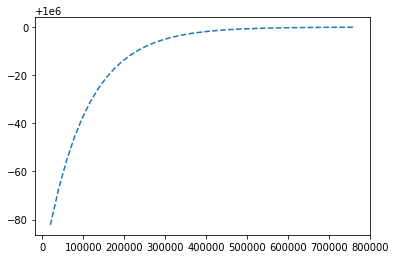

In [41]:

timeScaleToYears = np.linspace(0,TimeBetSnapshot_in_yr*(frameAmount-1),frameAmount)
x = timeScaleToYears[1:frameAmount]*frameNbrMultiplier
print(x)
params = [1e6 , 1e2 , 1e-5]
plt.plot(x, func(x, params[0], params[1], params[2]), '--', label="fitted")
#plt.plot(x, 1-np.exp(-x / 10000))

load data
load data
load data
load data
load data
load data
load data
load data
load data


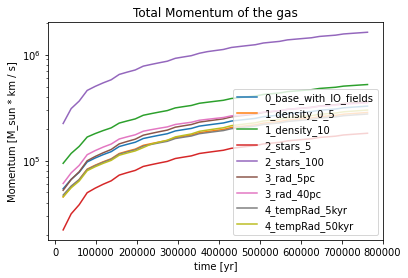

<Figure size 432x288 with 0 Axes>

/tmp/ipykernel_21249/3294238736.py:5: RuntimeWarning: overflow encountered in exp
  return p1 - p2 * np.exp(-p3 * x)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [45]:
dataNameForSaveFiles = "totalMomentum"
plotTitle = "Total Momentum of the gas"
plot_yLabel = "Momentum [M_sun * km / s]"
unitConversionFactor = UnitMass_in_Msun * UnitVelocity_in_km_per_s
functionToComputeData = clp.getTotalMomentum

TimeBetSnapshot_in_s = TimeBetSnapshot_in_unit_time * UnitTime_in_s
TimeBetSnapshot_in_yr = TimeBetSnapshot_in_s * sec_to_yr

dataArray = np.full((len(folderNames), frameAmount), 0, dtype = np.float64)

for i in range(len(folderNames)):
    dataArray[i] = clp.calculateOrLoadData(folder = dataFolders[i], 
                                        folderName = folderNames[i], 
                                        dataName = dataNameForSaveFiles, 
                                        calcDataOfOneSnapShotFunction = functionToComputeData, 
                                        frameAmount = frameAmount, 
                                        recalculate = False)

    



clp.PlotData(data = dataArray, 
         folderNames = folderNames, 
         title = plotTitle, 
         ylabel = plot_yLabel, 
         dataName = dataNameForSaveFiles, 
         unit_conversion_factor = unitConversionFactor,
         frameAmount = frameAmount, 
         frameNbrMultiplier = frameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)



## Provide an initial guess for the parameters
#p0 = [1e6 , 1e2 , 1e-5]
#
#timeScaleToYears = np.linspace(0,TimeBetSnapshot_in_yr*(frameAmount-1),frameAmount)
#x = timeScaleToYears[1:frameAmount]*frameNbrMultiplier
#
## Fit the function to the data
#params, _ = scipy.optimize.curve_fit(func, x, dataArray[i][1:frameAmount] * unitConversionFactor, p0)
#
#print(params)
#plt.plot(x, func(x, params[0], params[1], params[2]), '--', label="fitted")
#
##params = [1e6 , 2e2 , 1e-5]
##plt.plot(x, func(x, params[0], params[1], params[2]), '--', label="fitted")

### max radial Velocity

load data


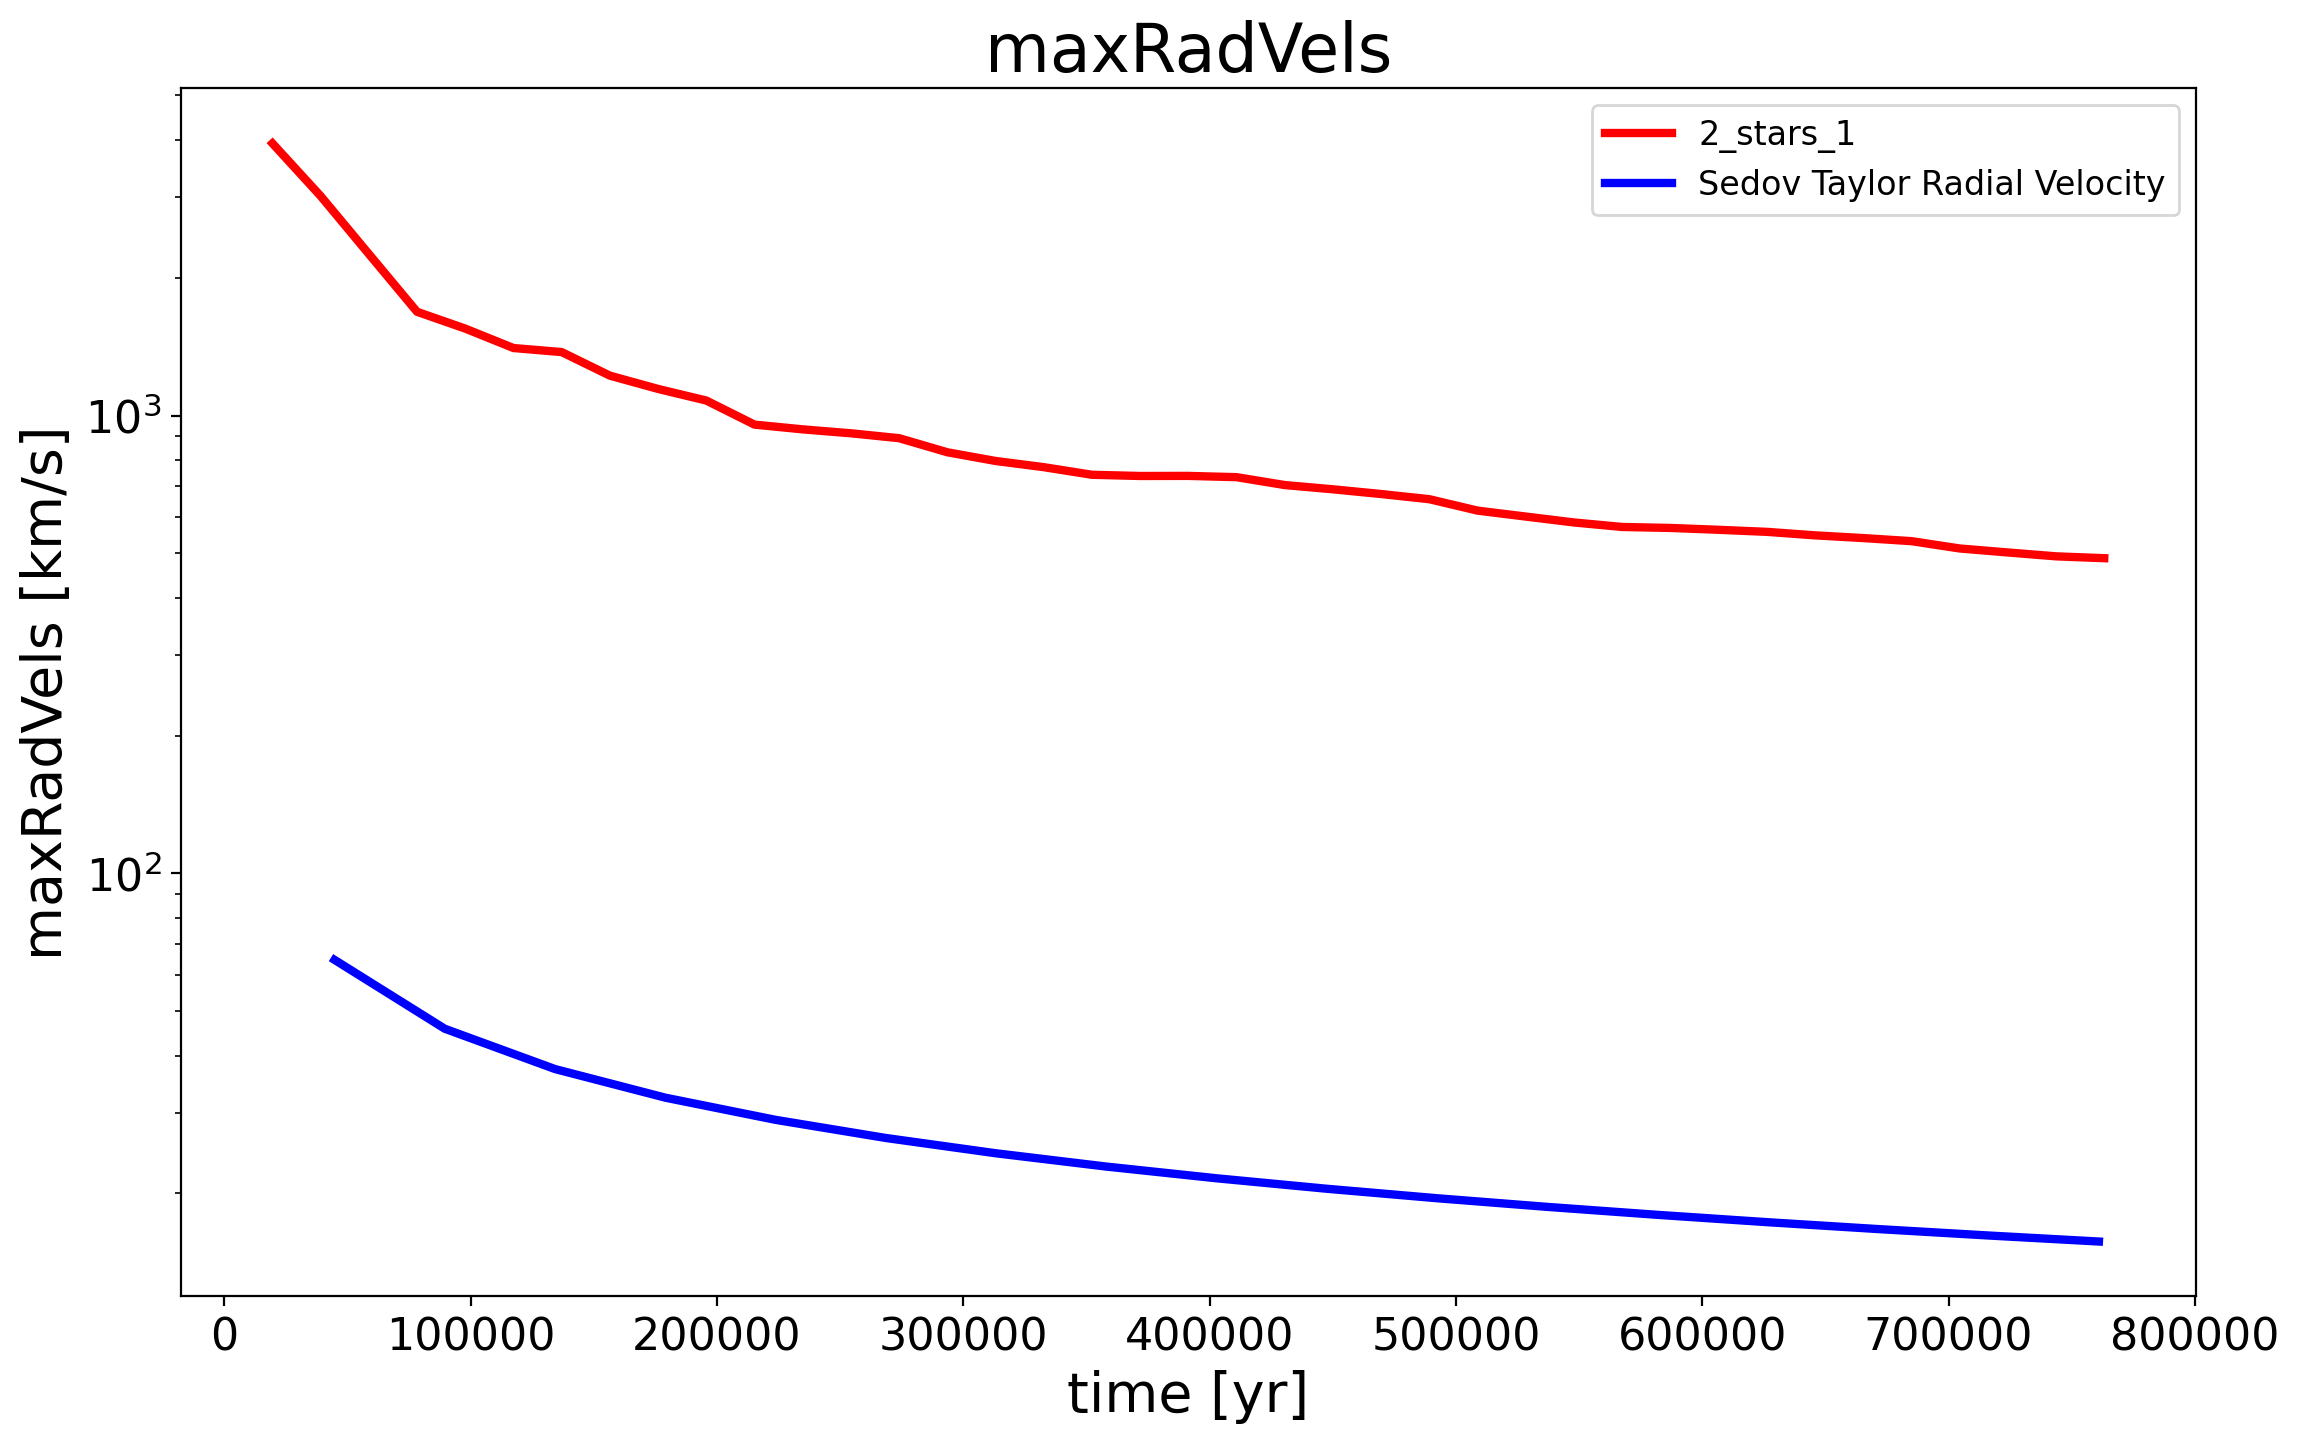

In [6]:
maxRadVelArray = np.full((len(folderNames), frameAmount), 0, dtype = np.float64)

for i in range(len(folderNames)):
    maxRadVelArray[i] = clp.calculateOrLoadData(folder = dataFolders[i], 
                                            folderName = folderNames[i], 
                                             dataName = "maxRadVels", 
                                             calcDataOfOneSnapShotFunction = clp.getMaxRadialGasVelocity, 
                                        frameAmount = frameAmount, 
                                             recalculate = False)

clp.PlotData(data = maxRadVelArray, 
         folderNames = folderNames, 
         title = "maxRadVels", 
         ylabel = "maxRadVels [km/s]", 
         dataName = "maxRadVels", 
         unit_conversion_factor = UnitVelocity_in_km_per_s,
         frameAmount = frameAmount, 
         frameNbrMultiplier = frameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticVelocities = True)

### Terminal Momentum Plots

Literatur:
https://academic.oup.com/mnras/article/492/1/1243/5670636
terminal momentum of 1SN: 3.000 M_sun km/s
11SNe: 35.000 M_sun km/s (0.6pc resolution)
11SNe: 25.000 M_sun km/s ( 20pc resolution)

 Hopkins et al. (2018b) prescribe ∼5 × 10^5 M⊙*N_SNe*km/s of momentum per SN (at ρ = 1.33mH cm−3)
 
 
Martizzi: https://academic.oup.com/mnras/article/450/1/504/998665 (Fig. 4)
1SN, n=100 cm-3 --> radial momentum of the shock 1e43 g*cm/s ~ 1e6 M_sun*km/s

In [6]:
folderPath = "/vera/ptmp/gc/xboecker/run/5_SN_cluster_final/"
baseFolderName = "0_base_with_IO_fields"

densityFoldersNames = ["1_density_0_2", "1_density_0_5", "1_density_2", "1_density_10", "1_density_25", "1_density_50", "1_density_75", "1_density_100", "1_density_500"]
baseDensity = 1
baseNumberdensity_in_cgs = baseDensity
densities = [0.2, 0.5, 2, 10, 25, 50, 75, 100, 500]
numberdensities_in_cgs = densities

starFolderNames = ["2_stars_1",  "2_stars_5",  "2_stars_50", "2_stars_100", "2_stars_500"]
baseNStar = 10
nStars = [1, 5, 50, 100]

radFolderNames = ["3_rad_0pc", "3_rad_5pc", "3_rad_20pc", "3_rad_40pc"]
baseRad = 10
rads = [0, 5, 20, 40]

tempRadFolderNames = ["4_tempRad_0kyr", "4_tempRad_5kyr", "4_tempRad_25kyr", "4_tempRad_50kyr"]
baseTempRad = 10
tempRads = [0, 5, 25, 50]

densityNStarFolderNames = ["12_density_10_stars_50", "12_density_10_stars_100", "12_density_50_stars_50", "12_density_100_stars_50", "12_density_100_stars_100"]
densityNStarDensities = [10,10, 50, 100, 100]
densityNStarNStars = [50,100, 50, 50, 100]

extraFolderNames = ["12_density_10_stars_100", "14_density_0_5_tempRad_25kyr", "23_stars_5_rad_5pc", "34_rad_40pc_tempRad_5kyr"]

folderNames = densityFoldersNames
folderNames = np.append(folderNames, starFolderNames)
folderNames = np.append(folderNames, radFolderNames)
folderNames = np.append(folderNames, tempRadFolderNames)
folderNames = np.append(folderNames, densityNStarFolderNames)
folderNames = np.append(folderNames, extraFolderNames)

densityDataFolders = np.full(len(densityFoldersNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")
starDataFolders = np.full(len(starFolderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")
radDataFolders = np.full(len(radFolderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")
tempRadDataFolders = np.full(len(tempRadFolderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")
densityNStarDataFolders = np.full(len(densityNStarFolderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")

dataFolders = np.full(len(folderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")

for i in range(len(densityDataFolders)):
    densityDataFolders[i] = folderPath+densityFoldersNames[i]+"/output"
for i in range(len(starDataFolders)):
    starDataFolders[i] = folderPath+starFolderNames[i]+"/output"
for i in range(len(radDataFolders)):
    radDataFolders[i] = folderPath+radFolderNames[i]+"/output"
for i in range(len(tempRadDataFolders)):
    tempRadDataFolders[i] = folderPath+tempRadFolderNames[i]+"/output"
for i in range(len(densityNStarDataFolders)):
    densityNStarDataFolders[i] = folderPath+densityNStarFolderNames[i]+"/output"
    
for i in range(len(folderNames)):
    dataFolders[i] = folderPath+folderNames[i]+"/output"
    
baseDataFolder = folderPath+baseFolderName+"/output"

In [7]:
# calculate terminal momenta (via total momentum of last snapshot)
lastFrame = 400

densityTerminalMomenta =  np.zeros(len(densityFoldersNames))
starTerminalMomenta =  np.zeros(len(starFolderNames))
radTerminalMomenta =  np.zeros(len(radFolderNames))
tempRadTerminalMomenta =  np.zeros(len(tempRadFolderNames))
densityNStarTerminalMomenta =  np.zeros(len(densityNStarFolderNames))
terminalMomenta =  np.zeros(len(folderNames))

for i in range(len(densityDataFolders)):
    densityTerminalMomenta[i] = clp.getTotalMomentum(densityDataFolders[i], lastFrame)
densityTerminalMomenta_in_mSun_kms = densityTerminalMomenta * UnitMass_in_Msun * UnitVelocity_in_km_per_s
for i in range(len(starDataFolders)):
    starTerminalMomenta[i] = clp.getTotalMomentum(starDataFolders[i], lastFrame)
starTerminalMomenta_in_mSun_kms = starTerminalMomenta * UnitMass_in_Msun * UnitVelocity_in_km_per_s
for i in range(len(radDataFolders)):
    radTerminalMomenta[i] = clp.getTotalMomentum(radDataFolders[i], lastFrame)
radTerminalMomenta_in_mSun_kms = radTerminalMomenta * UnitMass_in_Msun * UnitVelocity_in_km_per_s
for i in range(len(tempRadDataFolders)):
    tempRadTerminalMomenta[i] = clp.getTotalMomentum(tempRadDataFolders[i], lastFrame)
tempRadTerminalMomenta_in_mSun_kms = tempRadTerminalMomenta * UnitMass_in_Msun * UnitVelocity_in_km_per_s
for i in range(len(densityNStarDataFolders)):
    densityNStarTerminalMomenta[i] = clp.getTotalMomentum(densityNStarDataFolders[i], lastFrame)
densityNStarTerminalMomenta_in_mSun_kms = densityNStarTerminalMomenta * UnitMass_in_Msun * UnitVelocity_in_km_per_s
for i in range(len(folderNames)):
    terminalMomenta[i] = clp.getTotalMomentum(dataFolders[i], lastFrame)
terminalMomenta_in_mSun_kms = terminalMomenta * UnitMass_in_Msun * UnitVelocity_in_km_per_s

baseTerminalMomentum = clp.getTotalMomentum(baseDataFolder, lastFrame)
baseTerminalMomentum_in_mSun_kms = baseTerminalMomentum * UnitMass_in_Msun * UnitVelocity_in_km_per_s

In [8]:
minTerminalMomentum = np.min(terminalMomenta_in_mSun_kms)
maxTerminalMomentum = np.max(terminalMomenta_in_mSun_kms)

In [10]:
import scipy.optimize
import matplotlib.pyplot as plt

def monoLinear(x, m, t, b):
    return m * x + b

def monoParab(x, m, t, b):
    return m * x**2 + t * x + b

def monoParabLinear():
    (m * x**2 + t * x) * m2 * y + b

def monoExp(x, m, t, b):
    return m * np.exp(-t * x)

def monoLog(x, m, t, b):
    return m * np.log(t * x)


def monoLogExp(x, m, t1, t2, b):
    return m * np.log(t1 * x**(1/2)) * np.exp(-t2 * x)

def fitValues(xValues, yValues, fitFct, p0, calcQuality = True):

    # perform the fit
    #p0 = (1e6, .1, 1e6) # start with values near those we expect
    params, cv = scipy.optimize.curve_fit(fitFct, xValues, yValues, p0)
    m, t, b = params
    sampleRate = 20_000 # Hz
    tauSec = (1 / t) / sampleRate

    # determine quality of the fit
    
    if(calcQuality):
        squaredDiffs = np.square(yValues - fitFct(xValues, m, t, b))
        squaredDiffsFromMean = np.square(yValues - np.mean(yValues))
        rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
        print(f"R² = {rSquared}")

    # plot the results
    # plt.plot(xValues, yValues, '.', label="data") # plot values that got fitted again
    x = np.linspace(np.min(xValues), np.max(xValues), 30)
    plt.plot(x, fitFct(x, m, t, b), '--', label="fitted")
    plt.title("Fitted Curve")

    # inspect the parameters
    
    if(fitFct == monoParab):
        print(f"Y = {m} * x**2 + {t} * x + {b}")
    if(fitFct == monoLinear):
        print(f"Y = {m} * x + {b}")
    if(fitFct == monoExp):
        print(f"Y = {m} * e^(-{t} * x) + {b}")
    elif(fitFct == monoLog):
        print(f"Y = {m} * log({t} * x) + {b}")
    elif(fitFct == monoLogExp):
        t1,t2 = T
        print(f"Y = {m} * log({t} * x) + {b}")
    print(f"Tau = {tauSec * 1e6} µs")
    
def fitValues4params(xValues, yValues, fitFct, p0, calcQuality = True):

    # perform the fit
    #p0 = (1e6, .1, 1e6) # start with values near those we expect
    params, cv = scipy.optimize.curve_fit(fitFct, xValues, yValues, p0)
    m, t1,t2, b = params
    sampleRate = 20_000 # Hz
    tauSec = (1 / t1) / sampleRate

    # determine quality of the fit
    
    if(calcQuality):
        squaredDiffs = np.square(yValues - fitFct(xValues, m, t1,t2, b))
        squaredDiffsFromMean = np.square(yValues - np.mean(yValues))
        rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
        print(f"R² = {rSquared}")

    # plot the results
    # plt.plot(xValues, yValues, '.', label="data") # plot values that got fitted again
    x = np.logspace(-1, 3, 30)
    plt.plot(x, fitFct(x, m, t1,t2, b), '--', label="fitted")
    plt.title("Fitted Curve")

    # inspect the parameters
    if(fitFct == monoLinear):
        print(m + " * x + " + b)
    if(fitFct == monoExp):
        print(f"Y = {m} * e^(-{t} * x) + {b}")
    elif(fitFct == monoLog):
        print(f"Y = {m} * log({t} * x) + {b}")
    elif(fitFct == monoLogExp):
        print(f"Y = {m} * log({t1} * x) * e^(-{t2} * x) + {b}")
    print(f"Tau = {tauSec * 1e6} µs")
    
    return (m,t1,t2,b)

In [79]:
# densities = np.zeros(len(folderNames))
# nStar = np.array([10,10,10,10,1,5,100,10,10,10,10,10,10,10,10,100,10,5,10])
# rad = np.array([10,10,10,10,10,10,10,0,5,20,40,10,10,10,10,10,10,5,40])
# tempRad = np.array([10,10,10,10,10,10,10,10,10,10,10,0,5,25,50,10,25,10,5])
# for i in range(len(folderNames)):
#     densities[i] = clp.getDensities(dataFolders[i], 0)[0]
# densities /= densities[0]

#### Density vs n_star

In [17]:
def func(X): # x = density, y = nStars
    p0 = [-0.12210257,  0.18314572,  0.73106156,  5.47189316,  -0.020755209]
    p1 = p0[0]
    p2 = p0[1]
    p3 = p0[2]
    p4 = p0[3]
    p5 = p0[4]
    #p6 = p0[5]
    x,y = X
    return p1*x**2 + p2*x + p3 * y + p4 + p5 * x * y# + p6 * y**2

def oldFunc(X): # x = density, y = nStars
    p0 = [-0.126,  0.282,  0.609,  5.463]
    p1 = p0[0]
    p2 = p0[1]
    p3 = p0[2]
    p4 = p0[3]
    #p5 = p0[4]
    #p6 = p0[5]
    x,y = X
    return p1*x**2 + p2*x + p3 * y + p4# + p5 * x * y# + p6 * y**2

# Provide an initial guess for the parameters






def getTerminalMomentum(numberDensity, nStars):
    logDens = np.log10(numberDensity)
    logNStars = np.log10(nStars)
    #logTerminalMomentum = -0.126 * logDens**2 + 0.282 * logDens + 0.609 * logNStars + 5.463
    logTerminalMomentum = func((logDens, logNStars))
    logOldTerminalMomentum = oldFunc((logDens, logNStars))
    return 10**(logTerminalMomentum)#, 10**(logOldTerminalMomentum)

getTerminalMomentum(10, 1000)

46116396.339729495

[6703552.64 9885927.04 6402057.6  5653564.16 8892497.28]


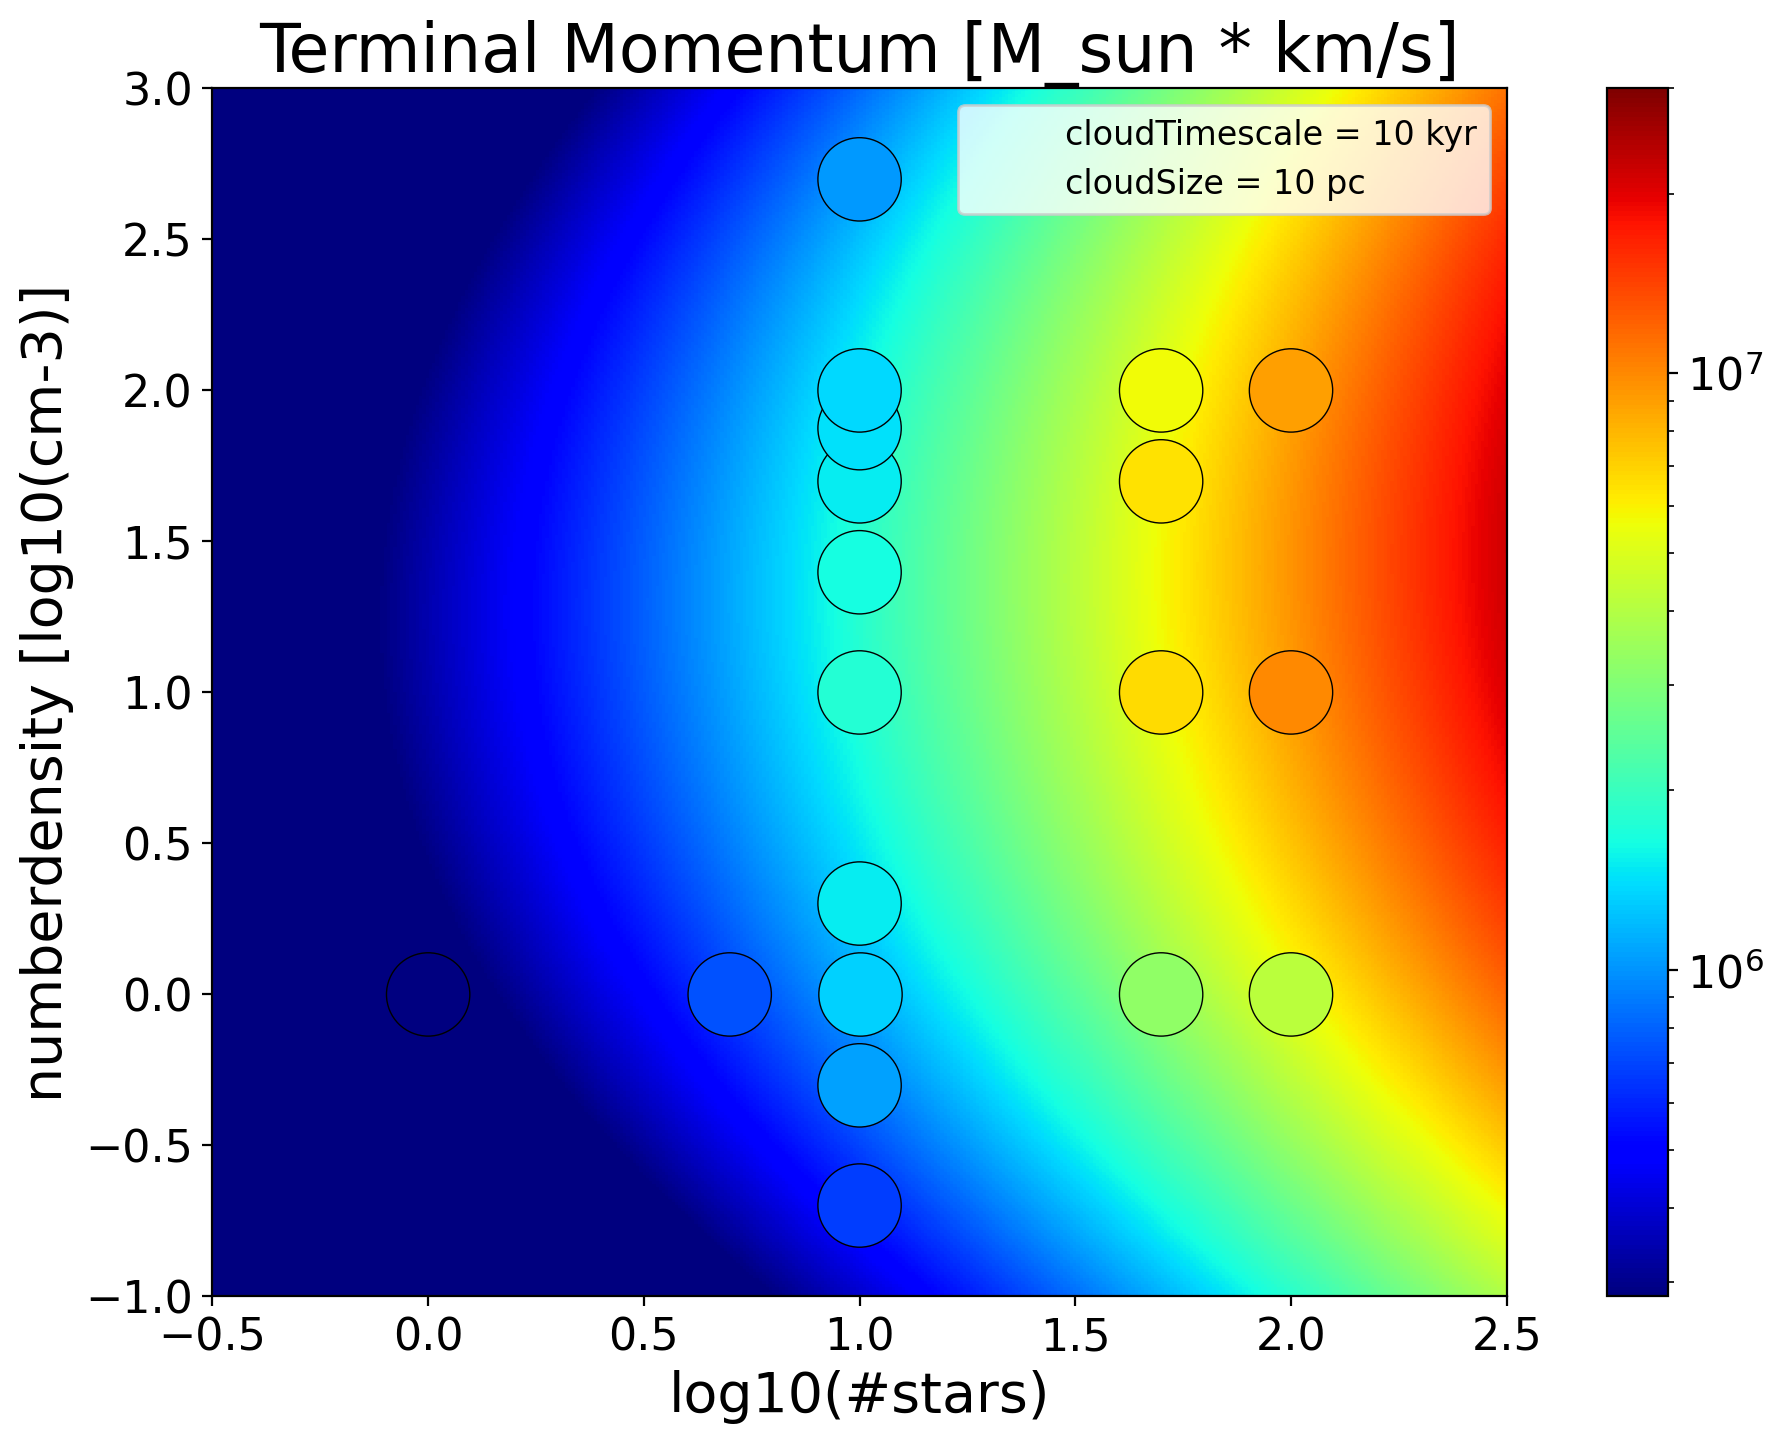

In [18]:
# Generate some sample data
x = np.logspace(-.5, 2.5, num=400, endpoint=True)
y = np.logspace(-1, 3, num=400, endpoint=True)
X, Y = np.meshgrid(x, y)
Z = getTerminalMomentum(Y,X)


# Create a figure and axis object
fig, ax = plt.subplots()

empty_patch = mpatches.Patch(color='none', label="cloudTimescale = 10 kyr") 
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10 pc") 

#fig.legend(handles=[empty_patch, empty_patch2])
legend = ax.legend(handles=[empty_patch, empty_patch2], loc='upper right', bbox_to_anchor=(1.0, 1.0))

# Create a background image with a color gradient
#im = ax.imshow(Z, cmap='jet', vmin = minTerminalMomentum, vmax = maxTerminalMomentum, extent=[-.5, 2.5, -1, 3])
#
#ax.scatter(np.log10(baseNStar), np.log10(baseDensity), c=baseTerminalMomentum_in_mSun_kms, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum, edgecolors='black', linewidths=0.5)
#ax.scatter(np.log10(np.full(len(densityFoldersNames), baseNStar)), np.log10(densities), c=densityTerminalMomenta_in_mSun_kms, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum, edgecolors='black', linewidths=0.5)
#ax.scatter(np.log10(nStars), np.log10(np.full(len(starFolderNames), baseDensity)), c=starTerminalMomenta_in_mSun_kms, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum, edgecolors='black', linewidths=0.5)
#ax.scatter(np.log10(densityNStarNStars), np.log10(densityNStarDensities), c=densityNStarTerminalMomenta_in_mSun_kms, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum, edgecolors='black', linewidths=0.5)


colorNorm = colors.LogNorm(vmin=minTerminalMomentum, vmax=3e7)
im = ax.imshow(Z, cmap='jet', norm=colorNorm, extent=[-.5, 2.5, -1, 3])

ax.scatter(np.log10(baseNStar), np.log10(baseDensity), c=baseTerminalMomentum_in_mSun_kms, cmap="jet", norm=colorNorm, edgecolors='black', linewidths=0.5)
ax.scatter(np.log10(np.full(len(densityFoldersNames), baseNStar)), np.log10(densities), c=densityTerminalMomenta_in_mSun_kms, cmap="jet", norm=colorNorm, edgecolors='black', linewidths=0.5)
ax.scatter(np.log10(nStars), np.log10(np.full(len(starFolderNames), baseDensity)), c=starTerminalMomenta_in_mSun_kms, cmap="jet", norm=colorNorm, edgecolors='black', linewidths=0.5)
ax.scatter(np.log10(densityNStarNStars), np.log10(densityNStarDensities), c=densityNStarTerminalMomenta_in_mSun_kms, cmap="jet", norm=colorNorm, edgecolors='black', linewidths=0.5)



print(densityNStarTerminalMomenta_in_mSun_kms)
ax.set_aspect(.7)

# Add a color bar to show the mapping between colors and values
cbar = fig.colorbar(im)

plt.title("Terminal Momentum [M_sun * km/s]")
plt.xlabel("log10(#stars)")
plt.ylabel("numberdensity [log10(cm-3)]")

plt.style.use('./my_style.mplstyle')

fig.savefig('/vera/u/xboecker/jupyterNotebooksOutputs/plots/Cluster/images/terminalMomentum_density_vs_nStar_with_new_fit.png', dpi=300)

# Show the plot
plt.show()

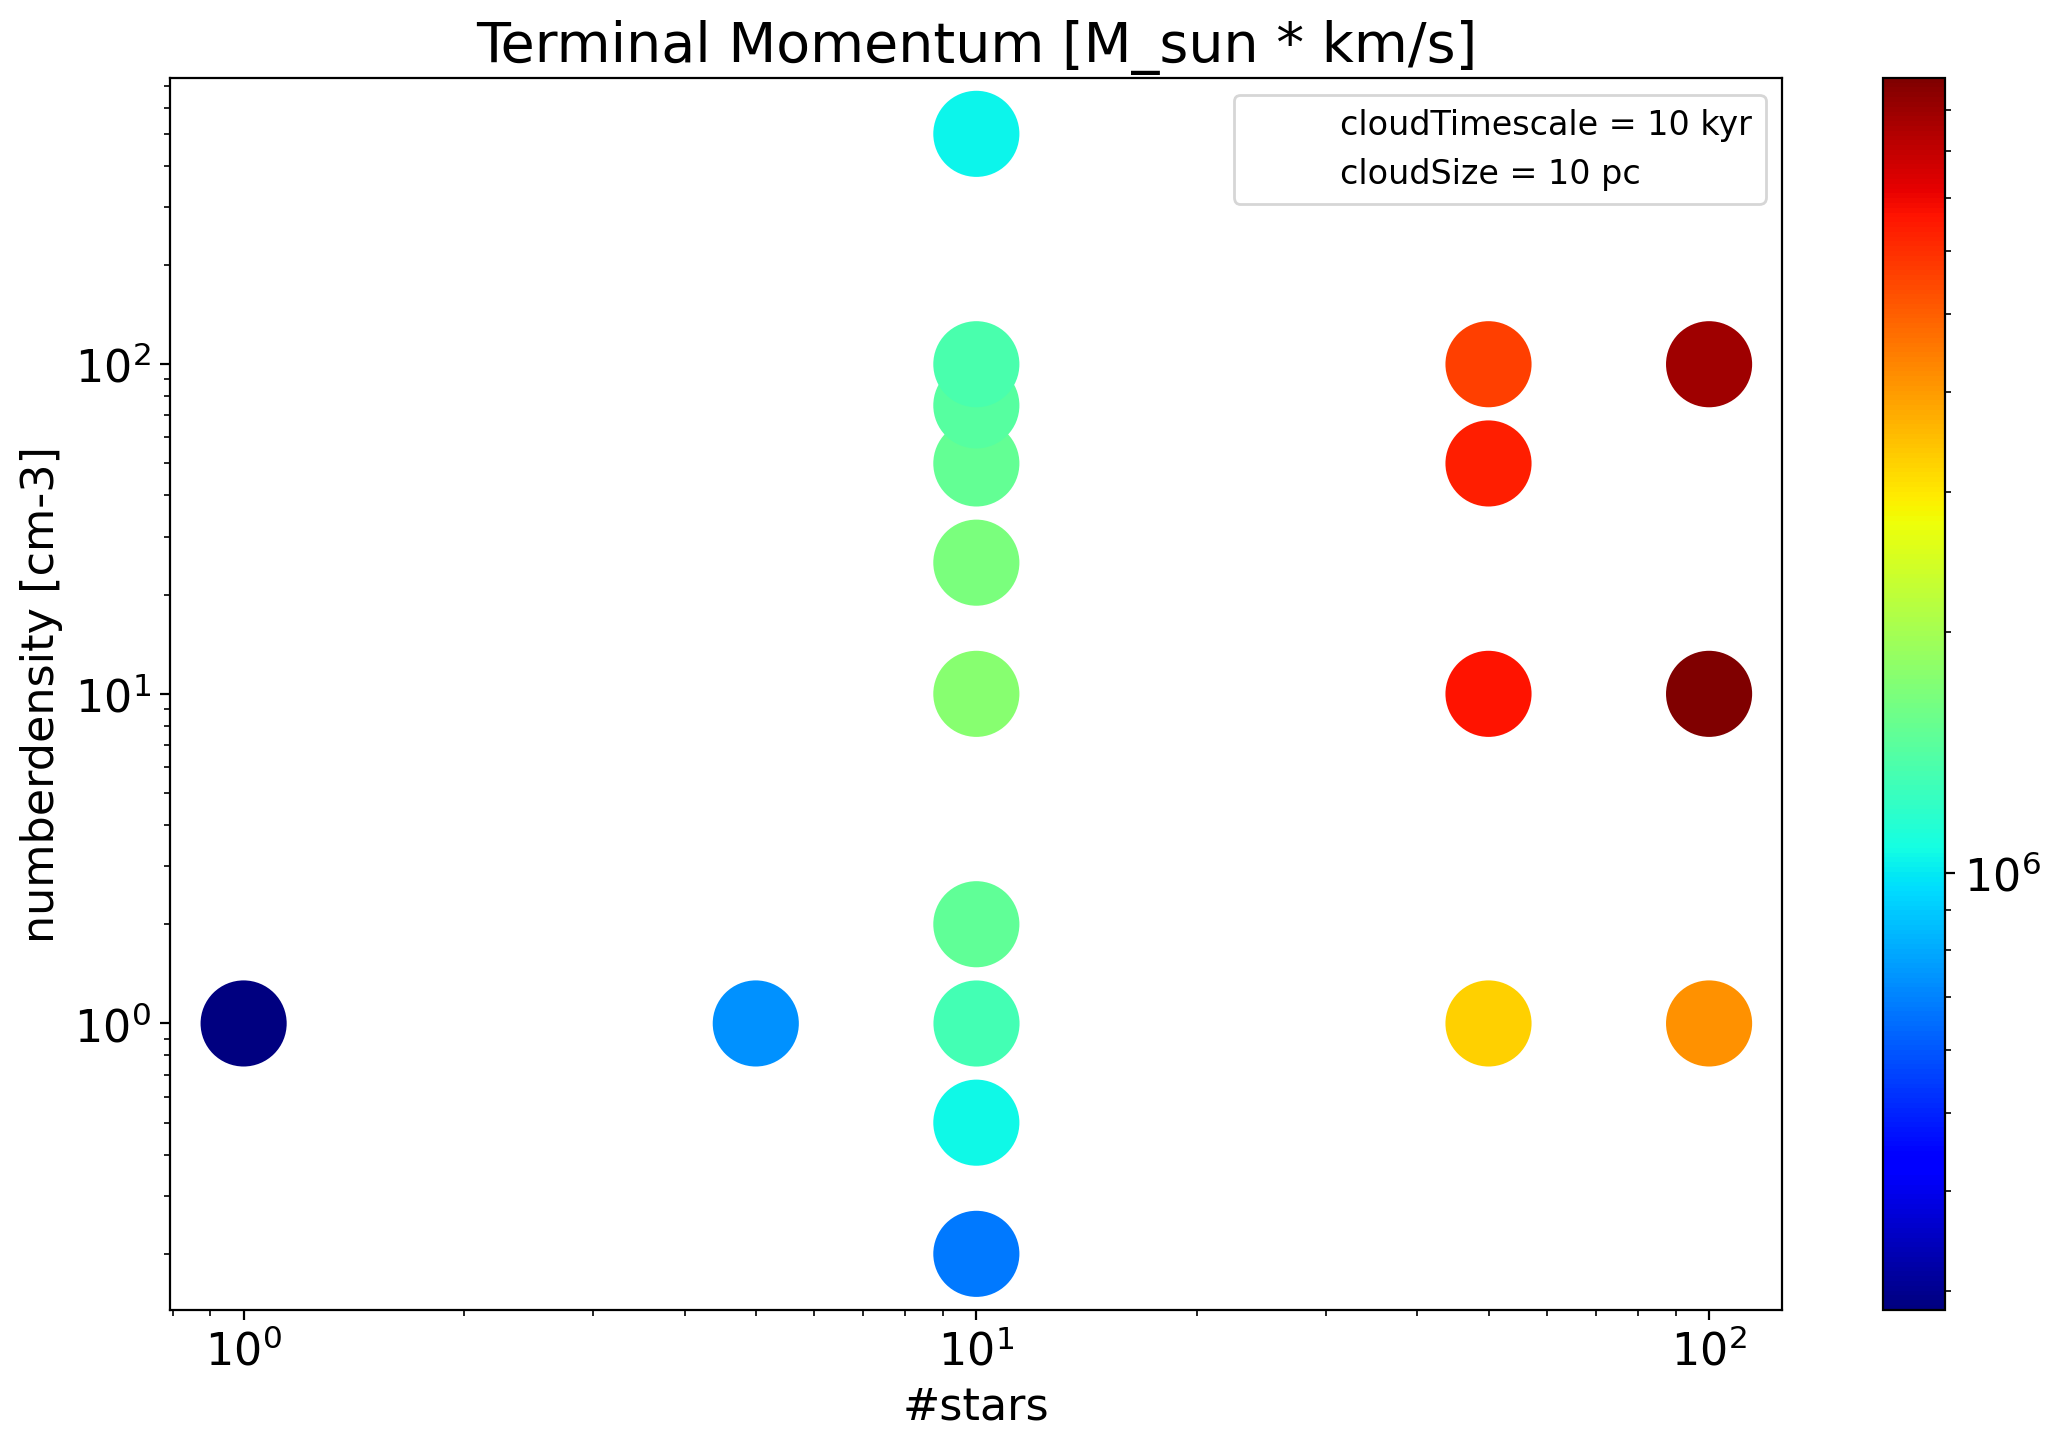

In [79]:
empty_patch = mpatches.Patch(color='none', label="cloudTimescale = 10 kyr") 
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10 pc") 
plt.style.use('./my_style.mplstyle')
#plt.style.use('default')
plt.legend(handles=[empty_patch, empty_patch2])

xVals = np.logspace(0, 2, num=10, endpoint=True)
yVals = np.logspace(-1, 2.5, num=10, endpoint=True)

s0 = plt.scatter(baseNStar, baseDensity, c=baseTerminalMomentum_in_mSun_kms, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)
s1 = plt.scatter(np.full(len(densityFoldersNames), baseNStar), densities, c=densityTerminalMomenta_in_mSun_kms, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)
s2 = plt.scatter(nStars, np.full(len(starFolderNames), baseDensity), c=starTerminalMomenta_in_mSun_kms, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)
s3 = plt.scatter(densityNStarNStars, densityNStarDensities, c=densityNStarTerminalMomenta_in_mSun_kms, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)

 
s0.set_norm(LogNorm())
s1.set_norm(LogNorm())
s2.set_norm(LogNorm())
s3.set_norm(LogNorm())
s0.set_clim(minTerminalMomentum,maxTerminalMomentum)
s1.set_clim(minTerminalMomentum,maxTerminalMomentum)
s2.set_clim(minTerminalMomentum,maxTerminalMomentum)
s3.set_clim(minTerminalMomentum,maxTerminalMomentum)


plt.title("Terminal Momentum [M_sun * km/s]")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("#stars")
plt.ylabel("numberdensity [cm-3]")
cbar = plt.colorbar()

plt.style.use('default')

plt.savefig("/vera/u/xboecker/jupyterNotebooksOutputs/plots/Cluster/images/terminalMomentum_density_vs_nStar")

#### CloudSize vs TimeScale

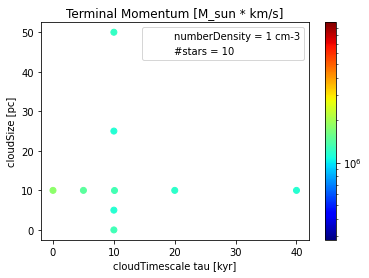

In [22]:
empty_patch = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch2 = mpatches.Patch(color='none', label="#stars = 10") 
plt.legend(handles=[empty_patch, empty_patch2])

s0 = plt.scatter(baseRad, baseTempRad, c=baseTerminalMomentum_in_mSun_kms, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)
s1 = plt.scatter(np.full(len(tempRadFolderNames), baseRad), tempRads, c=tempRadTerminalMomenta_in_mSun_kms, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)
s2 = plt.scatter(rads, np.full(len(radFolderNames), baseTempRad), c=radTerminalMomenta_in_mSun_kms, cmap="jet", vmin = minTerminalMomentum, vmax = maxTerminalMomentum)

#s1 = plt.scatter(rad[0], tempRad[0], c=terminalMomenta_in_cgs[0], cmap="jet")
#s2 = plt.scatter(rad[7:15], tempRad[7:15], c=terminalMomenta_in_cgs[7:15], cmap="jet", vmin = np.min(terminalMomenta) * UnitMass_in_Msun * UnitVelocity_in_km_per_s, vmax = np.max(terminalMomenta) * UnitMass_in_Msun * UnitVelocity_in_km_per_s)
#s3 = plt.scatter(rad[18], tempRad[18], c=terminalMomenta_in_cgs[18], cmap="jet")

s0.set_norm(LogNorm())
s1.set_norm(LogNorm())
s2.set_norm(LogNorm())
#s3.set_norm(LogNorm())
s0.set_clim(minTerminalMomentum,maxTerminalMomentum)
s1.set_clim(minTerminalMomentum,maxTerminalMomentum)
s2.set_clim(minTerminalMomentum,maxTerminalMomentum)
#s3.set_clim(minTerminalMomentum,maxTerminalMomentum)
plt.style.use('./my_style.mplstyle')

plt.title("Terminal Momentum [M_sun * km/s]")
plt.xlabel(r"cloudTimescale tau [kyr]")
plt.ylabel("cloudSize [pc]")
plt.colorbar()

### single parameter vs terminal momentum

Y = -0.1060593107091061 * x**2 + 0.24481212119605847 * x + 6.090556571342201
Tau = 204.23825321932227 µs
R² = 0.9933465138003696
Y = 0.5978148313319867 * x + 5.468963728054702
Tau = 468.7110750843088 µs
[0.69897    1.30103    1.60205999 1.        ]
[6.15903359 6.07924398 6.06677363 6.11805118]
R² = 0.9554076410933664
Y = -0.1048357460647431 * x + 6.226390694594327
Tau = 468.7110750843088 µs
[0.69897    1.39794001 1.69897    1.        ]
[6.06318127 6.0581141  6.08783739 6.11805118]
R² = 0.0001237896635718494
Y = 0.0006947773705180751 * x + 6.0809629503144995
Tau = 468.7110750843088 µs


/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


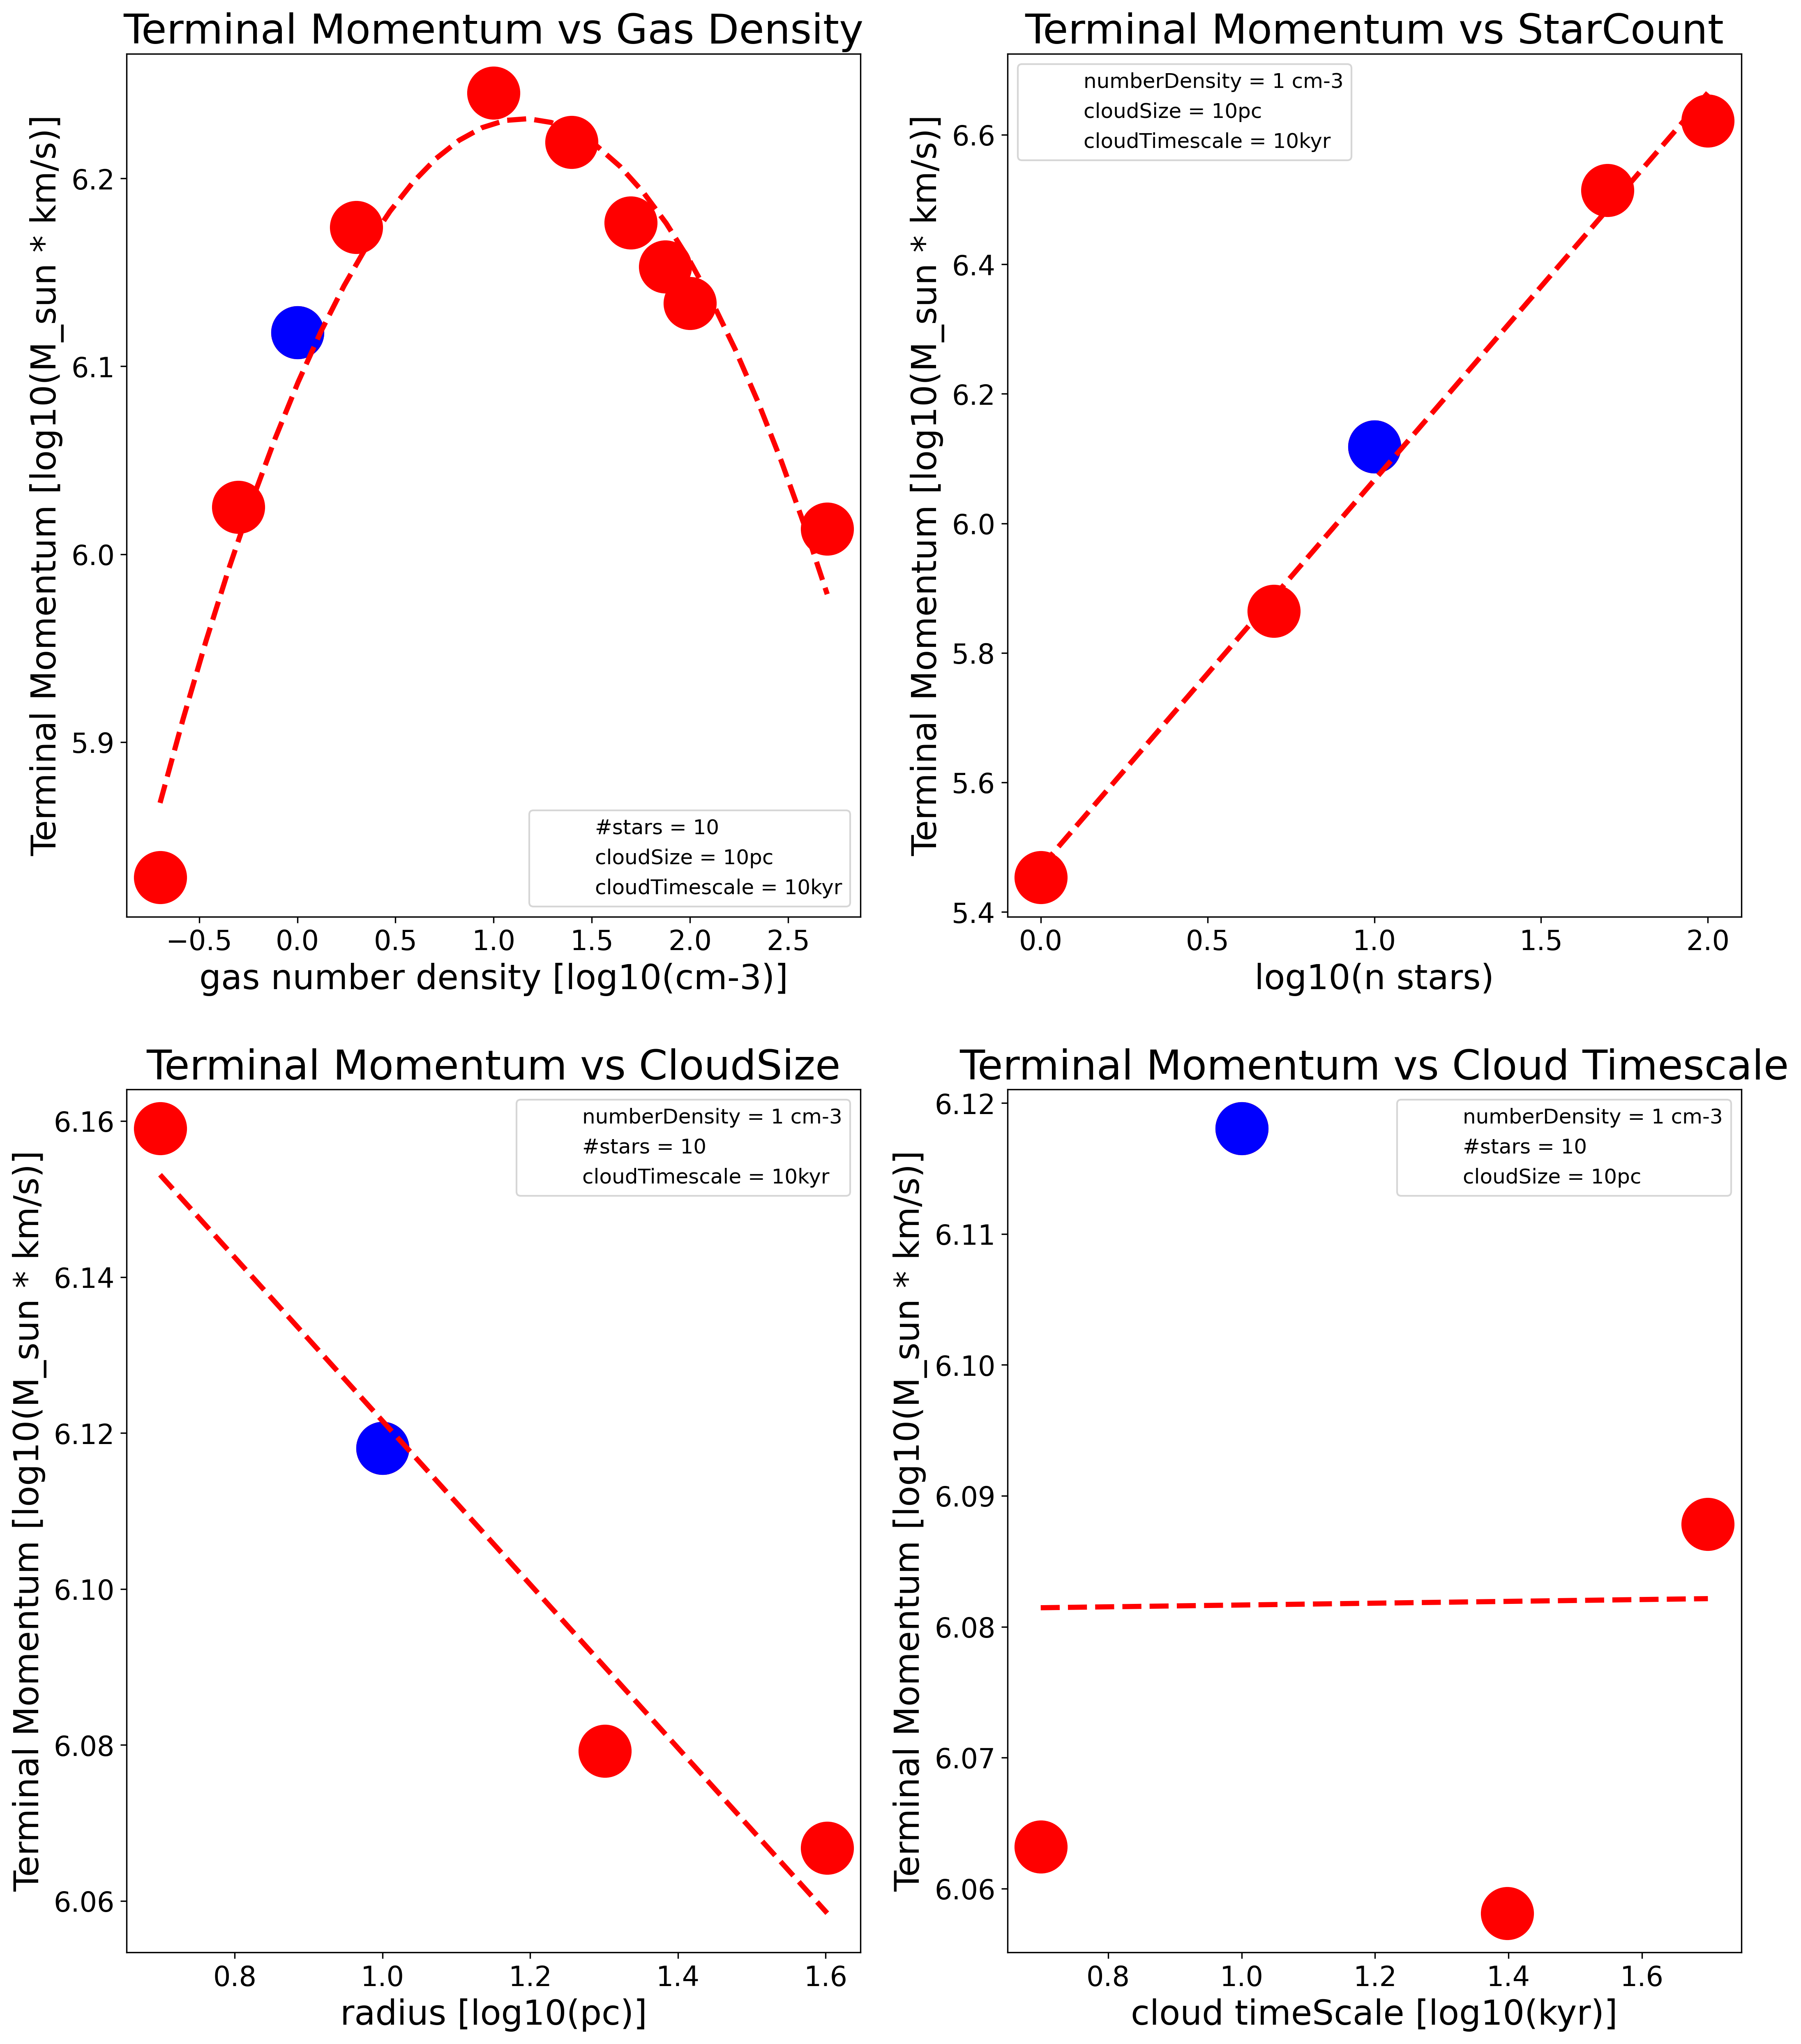

In [31]:
plt.subplots(nrows=2, ncols=2, figsize=(16.9,20.4), dpi=300)
# Create the first subplot
plt.subplot(2, 2, 1)
densityArrayToFit = np.append(densities, baseDensity)
densityTerminalMomentumArrayToFit = np.append(densityTerminalMomenta_in_mSun_kms, baseTerminalMomentum_in_mSun_kms)
xValues = np.log10(densityArrayToFit)
yValues = np.log10(densityTerminalMomentumArrayToFit)

def fct(x):
    return 4e5 * np.log(0.5 *x) * np.exp(-1e-1 * x) + 1.5e6


#x = np.linspace(np.min(densities), np.max(densities), 100000)
#x = np.logspace(-1, 3, 1000)
#plt.plot(x, fct(x), '--', label="fit test")

p0 = (1, 1, 1) # start with values near those we expect
#fitValues(densities[3:], densityTerminalMomenta_in_cgs[3:], monoExp, p0, False)
#p0 = (4e5, 0.5,0.1, 0)
fitValues(xValues, yValues, monoParab, p0, False)

plt.scatter(xValues, yValues)
plt.scatter(np.log10(baseDensity), np.log10(baseTerminalMomentum_in_mSun_kms))
#plt.scatter(densities, densityTerminalMomenta_in_cgs)

plt.title("Terminal Momentum vs Gas Density")
plt.xlabel("gas number density [log10(cm-3)]")
plt.ylabel("Terminal Momentum [log10(M_sun * km/s)]")

#plt.xscale("log")
#plt.yscale("log")

empty_patch1 = mpatches.Patch(color='none', label="#stars = 10")
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch1, empty_patch2, empty_patch3])






plt.subplot(2, 2, 2)
p0 = (1104807, .106675524983074746, 1406534) # start with values near those we expect
nStarArrayToFit = np.append(nStars, baseNStar)
nStarTerminalMomentumArrayToFit = np.append(starTerminalMomenta_in_mSun_kms, baseTerminalMomentum_in_mSun_kms)
xValues = np.log10(nStarArrayToFit)
yValues = np.log10(nStarTerminalMomentumArrayToFit)
fitValues(xValues, yValues, monoLinear, p0)

#plt.scatter(baseNStar, baseTerminalMomentum_in_cgs)
#plt.scatter(nStars, starTerminalMomenta_in_cgs)
plt.scatter(xValues, yValues)
plt.scatter(np.log10(baseNStar), np.log10(baseTerminalMomentum_in_mSun_kms))

#x = np.linspace(0,100, 30)
#plt.plot(x, 1200807.140591751 * np.log(0.124983074746 * x) + 1100000, color="orange")
#plt.plot(x, 1200807.140591751 * np.log(0.00000124983074746 * x) + 14900000, color="green")

plt.title("Terminal Momentum vs StarCount")
plt.xlabel("log10(n stars)")
plt.ylabel("Terminal Momentum [log10(M_sun * km/s)]")

#plt.xscale("log")
#plt.yscale("log")

empty_patch0 = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch1 = mpatches.Patch(color='none', label="#stars = 10") 
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch0, empty_patch2, empty_patch3])





plt.subplot(2, 2, 3)
#terminalMomentum = -4224807.140591751 * log(0.026675524983074746 * nStar) + 4446534.69925895
# perform the fit
p0 = (1104807, .106675524983074746, 1406534) # start with values near those we expect
radArrayToFit = np.append(rads[1:], baseRad)
radTerminalMomentumArrayToFit = np.append(radTerminalMomenta_in_mSun_kms[1:], baseTerminalMomentum_in_mSun_kms)
xValues = np.log10(radArrayToFit)
yValues = np.log10(radTerminalMomentumArrayToFit)
print(xValues)
print(yValues)
fitValues(xValues, yValues, monoLinear, p0)

#plt.scatter(baseNStar, baseTerminalMomentum_in_cgs)
#plt.scatter(nStars, starTerminalMomenta_in_cgs)
plt.scatter(xValues, yValues)
plt.scatter(np.log10(baseRad), np.log10(baseTerminalMomentum_in_mSun_kms))

#x = np.linspace(0,100, 30)
#plt.plot(x, 1200807.140591751 * np.log(0.124983074746 * x) + 1100000, color="orange")
#plt.plot(x, 1200807.140591751 * np.log(0.00000124983074746 * x) + 14900000, color="green")

plt.title("Terminal Momentum vs CloudSize")
plt.xlabel("radius [log10(pc)]")
plt.ylabel("Terminal Momentum [log10(M_sun * km/s)]")

#plt.xscale("log")
#plt.yscale("log")

empty_patch0 = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch1 = mpatches.Patch(color='none', label="#stars = 10") 
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch0, empty_patch1, empty_patch3])





plt.subplot(2, 2, 4)
#terminalMomentum = -4224807.140591751 * log(0.026675524983074746 * nStar) + 4446534.69925895
# perform the fit
p0 = (1104807, .106675524983074746, 1406534) # start with values near those we expect
tempRadArrayToFit = np.append(tempRads[1:], baseTempRad)
tempRadTerminalMomentumArrayToFit = np.append(tempRadTerminalMomenta_in_mSun_kms[1:], baseTerminalMomentum_in_mSun_kms)
xValues = np.log10(tempRadArrayToFit)
yValues = np.log10(tempRadTerminalMomentumArrayToFit)
print(xValues)
print(yValues)
fitValues(xValues, yValues, monoLinear, p0)

#plt.scatter(baseNStar, baseTerminalMomentum_in_cgs)
#plt.scatter(nStars, starTerminalMomenta_in_cgs)
plt.scatter(xValues, yValues)
plt.scatter(np.log10(baseTempRad), np.log10(baseTerminalMomentum_in_mSun_kms))

#x = np.linspace(0,100, 30)
#plt.plot(x, 1200807.140591751 * np.log(0.124983074746 * x) + 1100000, color="orange")
#plt.plot(x, 1200807.140591751 * np.log(0.00000124983074746 * x) + 14900000, color="green")

plt.title("Terminal Momentum vs Cloud Timescale")
plt.xlabel("cloud timeScale [log10(kyr)]")
plt.ylabel("Terminal Momentum [log10(M_sun * km/s)]")

plt.style.use('./my_style.mplstyle')

empty_patch0 = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch1 = mpatches.Patch(color='none', label="#stars = 10")
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch0, empty_patch1, empty_patch2])



plt.savefig('/vera/u/xboecker/jupyterNotebooksOutputs/plots/Cluster/images/all_params_individual_fits.png', dpi=300)


#### density

Y = -0.1060593107091061 * x**2 + 0.24481212119605847 * x + 6.090556571342201
Tau = 204.23825321932227 µs


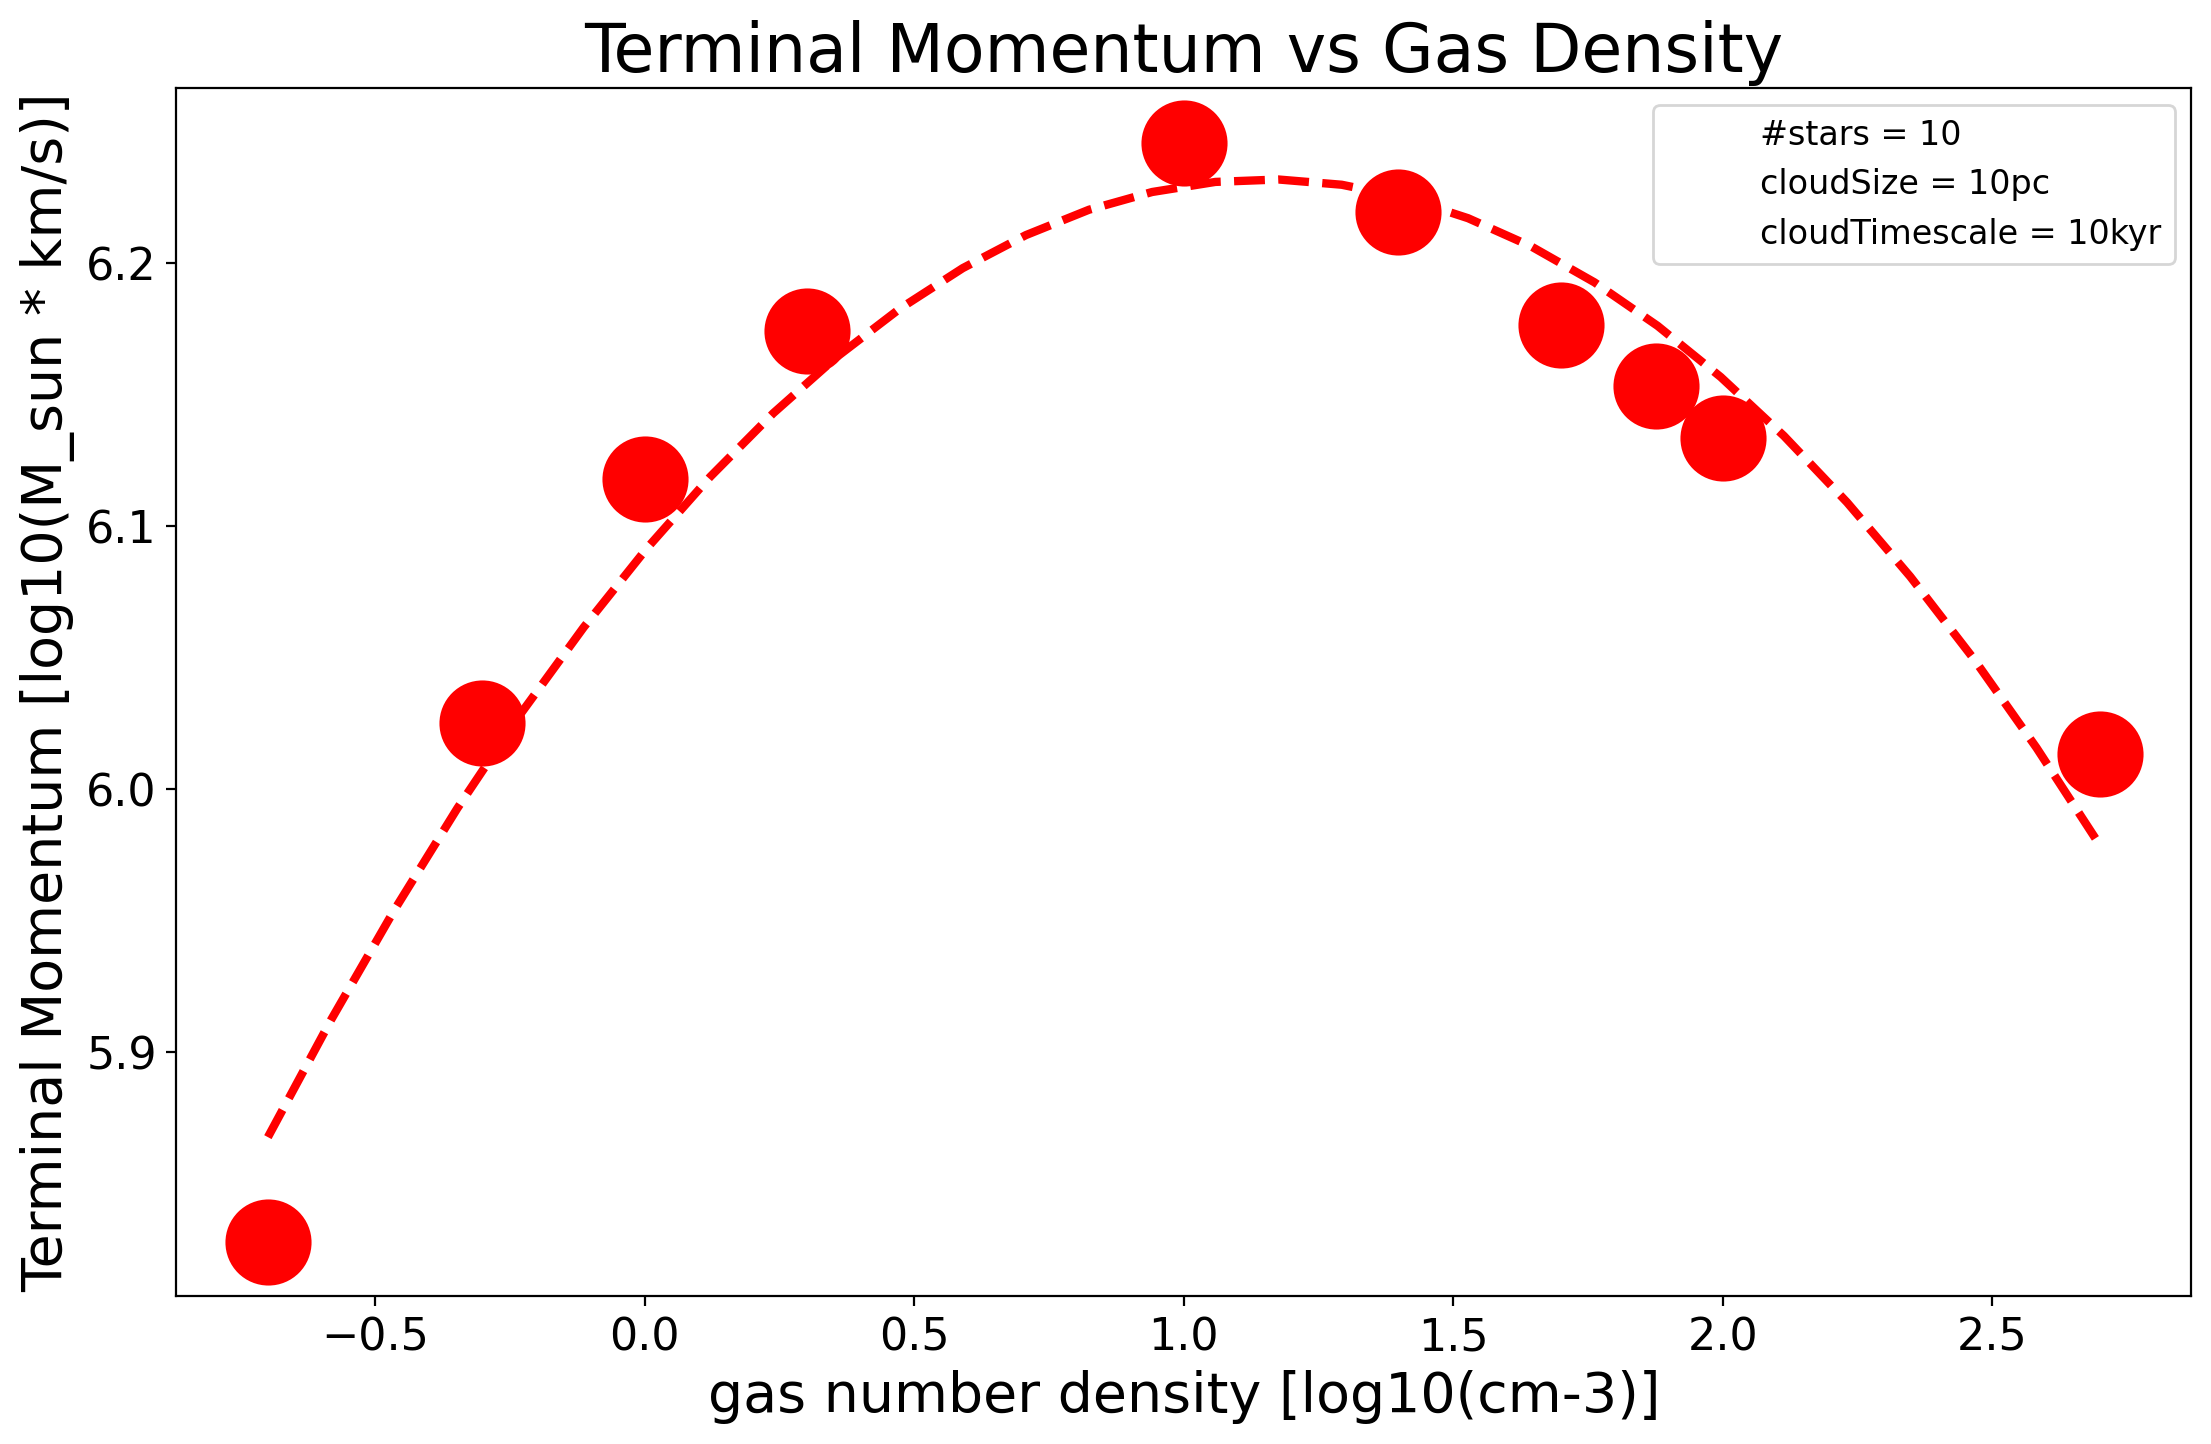

In [16]:
densityArrayToFit = np.append(densities, baseDensity)
densityTerminalMomentumArrayToFit = np.append(densityTerminalMomenta_in_mSun_kms, baseTerminalMomentum_in_mSun_kms)
xValues = np.log10(densityArrayToFit)
yValues = np.log10(densityTerminalMomentumArrayToFit)

def fct(x):
    return 4e5 * np.log(0.5 *x) * np.exp(-1e-1 * x) + 1.5e6


#x = np.linspace(np.min(densities), np.max(densities), 100000)
#x = np.logspace(-1, 3, 1000)
#plt.plot(x, fct(x), '--', label="fit test")

p0 = (1, 1, 1) # start with values near those we expect
#fitValues(densities[3:], densityTerminalMomenta_in_cgs[3:], monoExp, p0, False)
#p0 = (4e5, 0.5,0.1, 0)
fitValues(xValues, yValues, monoParab, p0, False)

plt.scatter(xValues, yValues)
#plt.scatter(densities, densityTerminalMomenta_in_cgs)

plt.title("Terminal Momentum vs Gas Density")
plt.xlabel("gas number density [log10(cm-3)]")
plt.ylabel("Terminal Momentum [log10(M_sun * km/s)]")

#plt.xscale("log")
#plt.yscale("log")

empty_patch1 = mpatches.Patch(color='none', label="#stars = 10")
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch1, empty_patch2, empty_patch3])

At the start: not much gas is heated, gets very fast but still has not much impact because it is just not much
At the end: very dens gas --> it doesn't really start moving

#### nStar

R² = 0.9933465138003696
Y = 0.5978148329134113 * x + 5.4689637263707045
Tau = 500.0 µs


/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


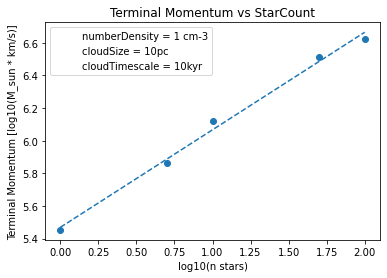

In [29]:


#terminalMomentum = -4224807.140591751 * log(0.026675524983074746 * nStar) + 4446534.69925895
# perform the fit
p0 = (1104807, .106675524983074746, 1406534) # start with values near those we expect
nStarArrayToFit = np.append(nStars, baseNStar)
nStarTerminalMomentumArrayToFit = np.append(starTerminalMomenta_in_mSun_kms, baseTerminalMomentum_in_mSun_kms)
xValues = np.log10(nStarArrayToFit)
yValues = np.log10(nStarTerminalMomentumArrayToFit)
fitValues(xValues, yValues, monoLinear, p0)

#plt.scatter(baseNStar, baseTerminalMomentum_in_cgs)
#plt.scatter(nStars, starTerminalMomenta_in_cgs)
plt.scatter(xValues, yValues)

#x = np.linspace(0,100, 30)
#plt.plot(x, 1200807.140591751 * np.log(0.124983074746 * x) + 1100000, color="orange")
#plt.plot(x, 1200807.140591751 * np.log(0.00000124983074746 * x) + 14900000, color="green")

plt.title("Terminal Momentum vs StarCount")
plt.xlabel("log10(n stars)")
plt.ylabel("Terminal Momentum [log10(M_sun * km/s)]")

#plt.xscale("log")
#plt.yscale("log")

empty_patch0 = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch1 = mpatches.Patch(color='none', label="#stars = 10") 
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch0, empty_patch2, empty_patch3])

#### Fit Density and nStar

In [14]:
# data from density variation
densityArrayToFit = np.append(densities, baseDensity)
densityTerminalMomentumArrayToFit = np.append(densityTerminalMomenta_in_mSun_kms, baseTerminalMomentum_in_mSun_kms)
xValues = np.log10(densityArrayToFit)
yValues = np.full(len(densities)+1, np.log10(baseNStar))
zValues = np.log10(densityTerminalMomentumArrayToFit)

# data from nStar variation
nStarArrayToFit = np.append(nStars, baseNStar)
nStarTerminalMomentumArrayToFit = np.append(starTerminalMomenta_in_mSun_kms, baseTerminalMomentum_in_mSun_kms)
xValues = np.append(xValues, np.full(len(nStars)+1, np.log10(baseDensity)))
yValues = np.append(yValues,np.log10(nStarArrayToFit))
zValues = np.append(zValues ,np.log10(nStarTerminalMomentumArrayToFit))

# data from variing both
#xValues = np.append(xValues, np.log10(densityNStarDensities))
#yValues = np.append(yValues, np.log10(densityNStarNStars))
#zValues = np.append(zValues, np.log10(densityNStarTerminalMomenta_in_mSun_kms))

[-0.10440619  0.24696637  0.59594471  5.48295471]


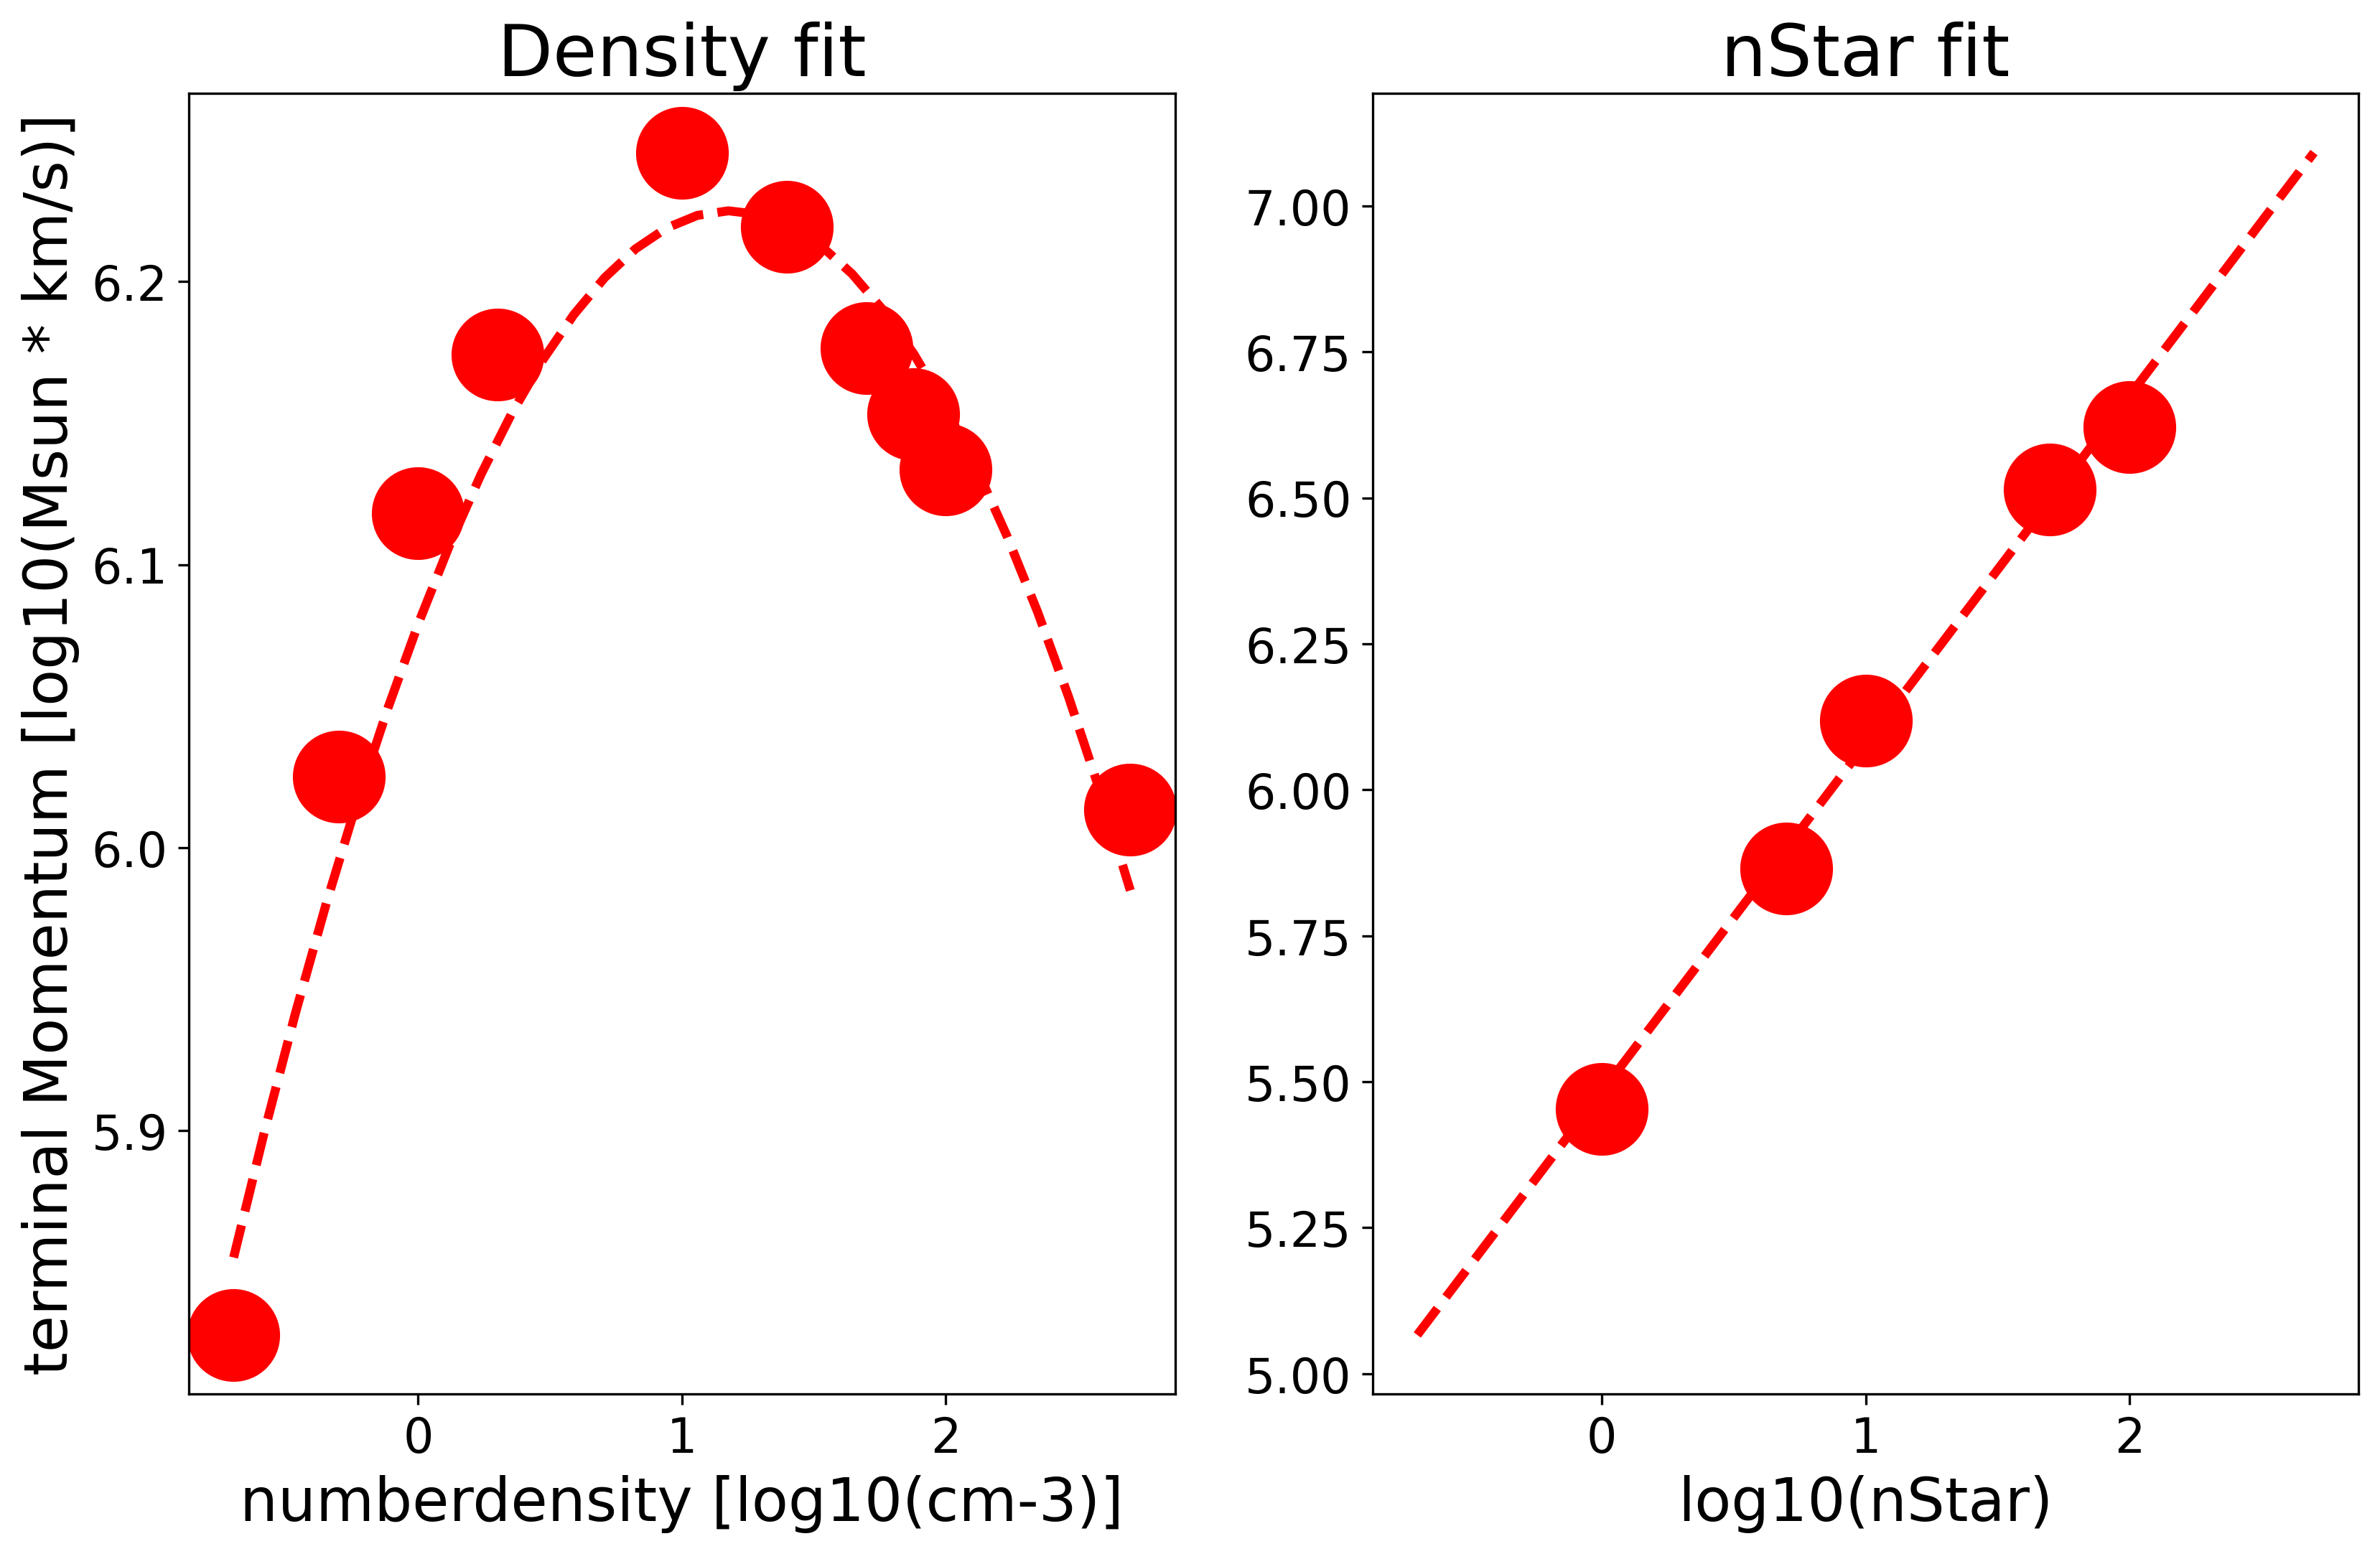

In [15]:
# Define the function to be fitted
def func(X, p1, p2, p3, p4):#, p5):#, p6): # x = density, y = nStars
    x,y = X
    return p1*x**2 + p2*x + p3 * y + p4# + p5 * x * y# + p6 * y**2

# Provide an initial guess for the parameters
p0 = [-0.18758444,  0.10505232,  0.8005973,   5.47980264]

# Fit the function to the data
params, _ = scipy.optimize.curve_fit(func, (xValues, yValues), zValues, p0)

print(params)

#params = (-0.12573352 , 0.28171343 , 0.6093318 , 5.46282896) # for (a*x**2 + b*x) + m * y + c


plt.subplots(nrows=1, ncols=2, figsize=(13,8), dpi=300)
# Create the first subplot
plt.subplot(1, 2, 1)
x = np.linspace(np.min(xValues), np.max(xValues), 30)
plt.plot(x, func((x,1), params[0], params[1], params[2], params[3]), '--', label="fitted")
plt.scatter(np.log10(densityArrayToFit), np.log10(densityTerminalMomentumArrayToFit))
plt.title('Density fit')
plt.xlabel("numberdensity [log10(cm-3)]")
plt.ylabel("terminal Momentum [log10(Msun * km/s)]")

# Create the second subplot
plt.subplot(1, 2, 2)
x = np.linspace(np.min(xValues), np.max(xValues), 30)
plt.plot(x, func((0,x), params[0], params[1], params[2], params[3]), '--', label="fitted")
plt.scatter(np.log10(nStarArrayToFit), np.log10(nStarTerminalMomentumArrayToFit))
plt.title('nStar fit')
plt.xlabel("log10(nStar)")

plt.savefig('/vera/u/xboecker/jupyterNotebooksOutputs/plots/Cluster/images/terminalMomentum_density_and_nStar_fit.png', dpi=300)


# Show the plot
plt.show()


TerminalMomentum = (-0.05935096 * log10(density)^2 + 0.13860463 * log10(density)) * 0.20417522 * log10(nStar) + 6.08876334

#### rad

[0.69897    1.30103    1.60205999 1.        ]
[6.15903359 6.07924398 6.06677363 6.11805118]
R² = 0.9554076410933664
Y = -0.1048357460647431 * x + 6.226390694594327
Tau = 468.7110750843088 µs


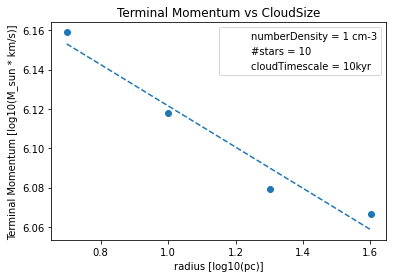

In [18]:
#terminalMomentum = -4224807.140591751 * log(0.026675524983074746 * nStar) + 4446534.69925895
# perform the fit
p0 = (1104807, .106675524983074746, 1406534) # start with values near those we expect
radArrayToFit = np.append(rads[1:], baseRad)
radTerminalMomentumArrayToFit = np.append(radTerminalMomenta_in_mSun_kms[1:], baseTerminalMomentum_in_mSun_kms)
xValues = np.log10(radArrayToFit)
yValues = np.log10(radTerminalMomentumArrayToFit)
print(xValues)
print(yValues)
fitValues(xValues, yValues, monoLinear, p0)

#plt.scatter(baseNStar, baseTerminalMomentum_in_cgs)
#plt.scatter(nStars, starTerminalMomenta_in_cgs)
plt.scatter(xValues, yValues)

#x = np.linspace(0,100, 30)
#plt.plot(x, 1200807.140591751 * np.log(0.124983074746 * x) + 1100000, color="orange")
#plt.plot(x, 1200807.140591751 * np.log(0.00000124983074746 * x) + 14900000, color="green")

plt.title("Terminal Momentum vs CloudSize")
plt.xlabel("radius [log10(pc)]")
plt.ylabel("Terminal Momentum [log10(M_sun * km/s)]")

#plt.xscale("log")
#plt.yscale("log")

empty_patch0 = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch1 = mpatches.Patch(color='none', label="#stars = 10") 
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch0, empty_patch1, empty_patch3])

#### tempRad

[0.69897    1.39794001 1.69897    1.        ]
[6.06318127 6.0581141  6.08783739 6.11805118]
R² = 0.0001237896635718494
Y = 0.0006947773705180751 * x + 6.0809629503144995
Tau = 468.7110750843088 µs


/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2021.11/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


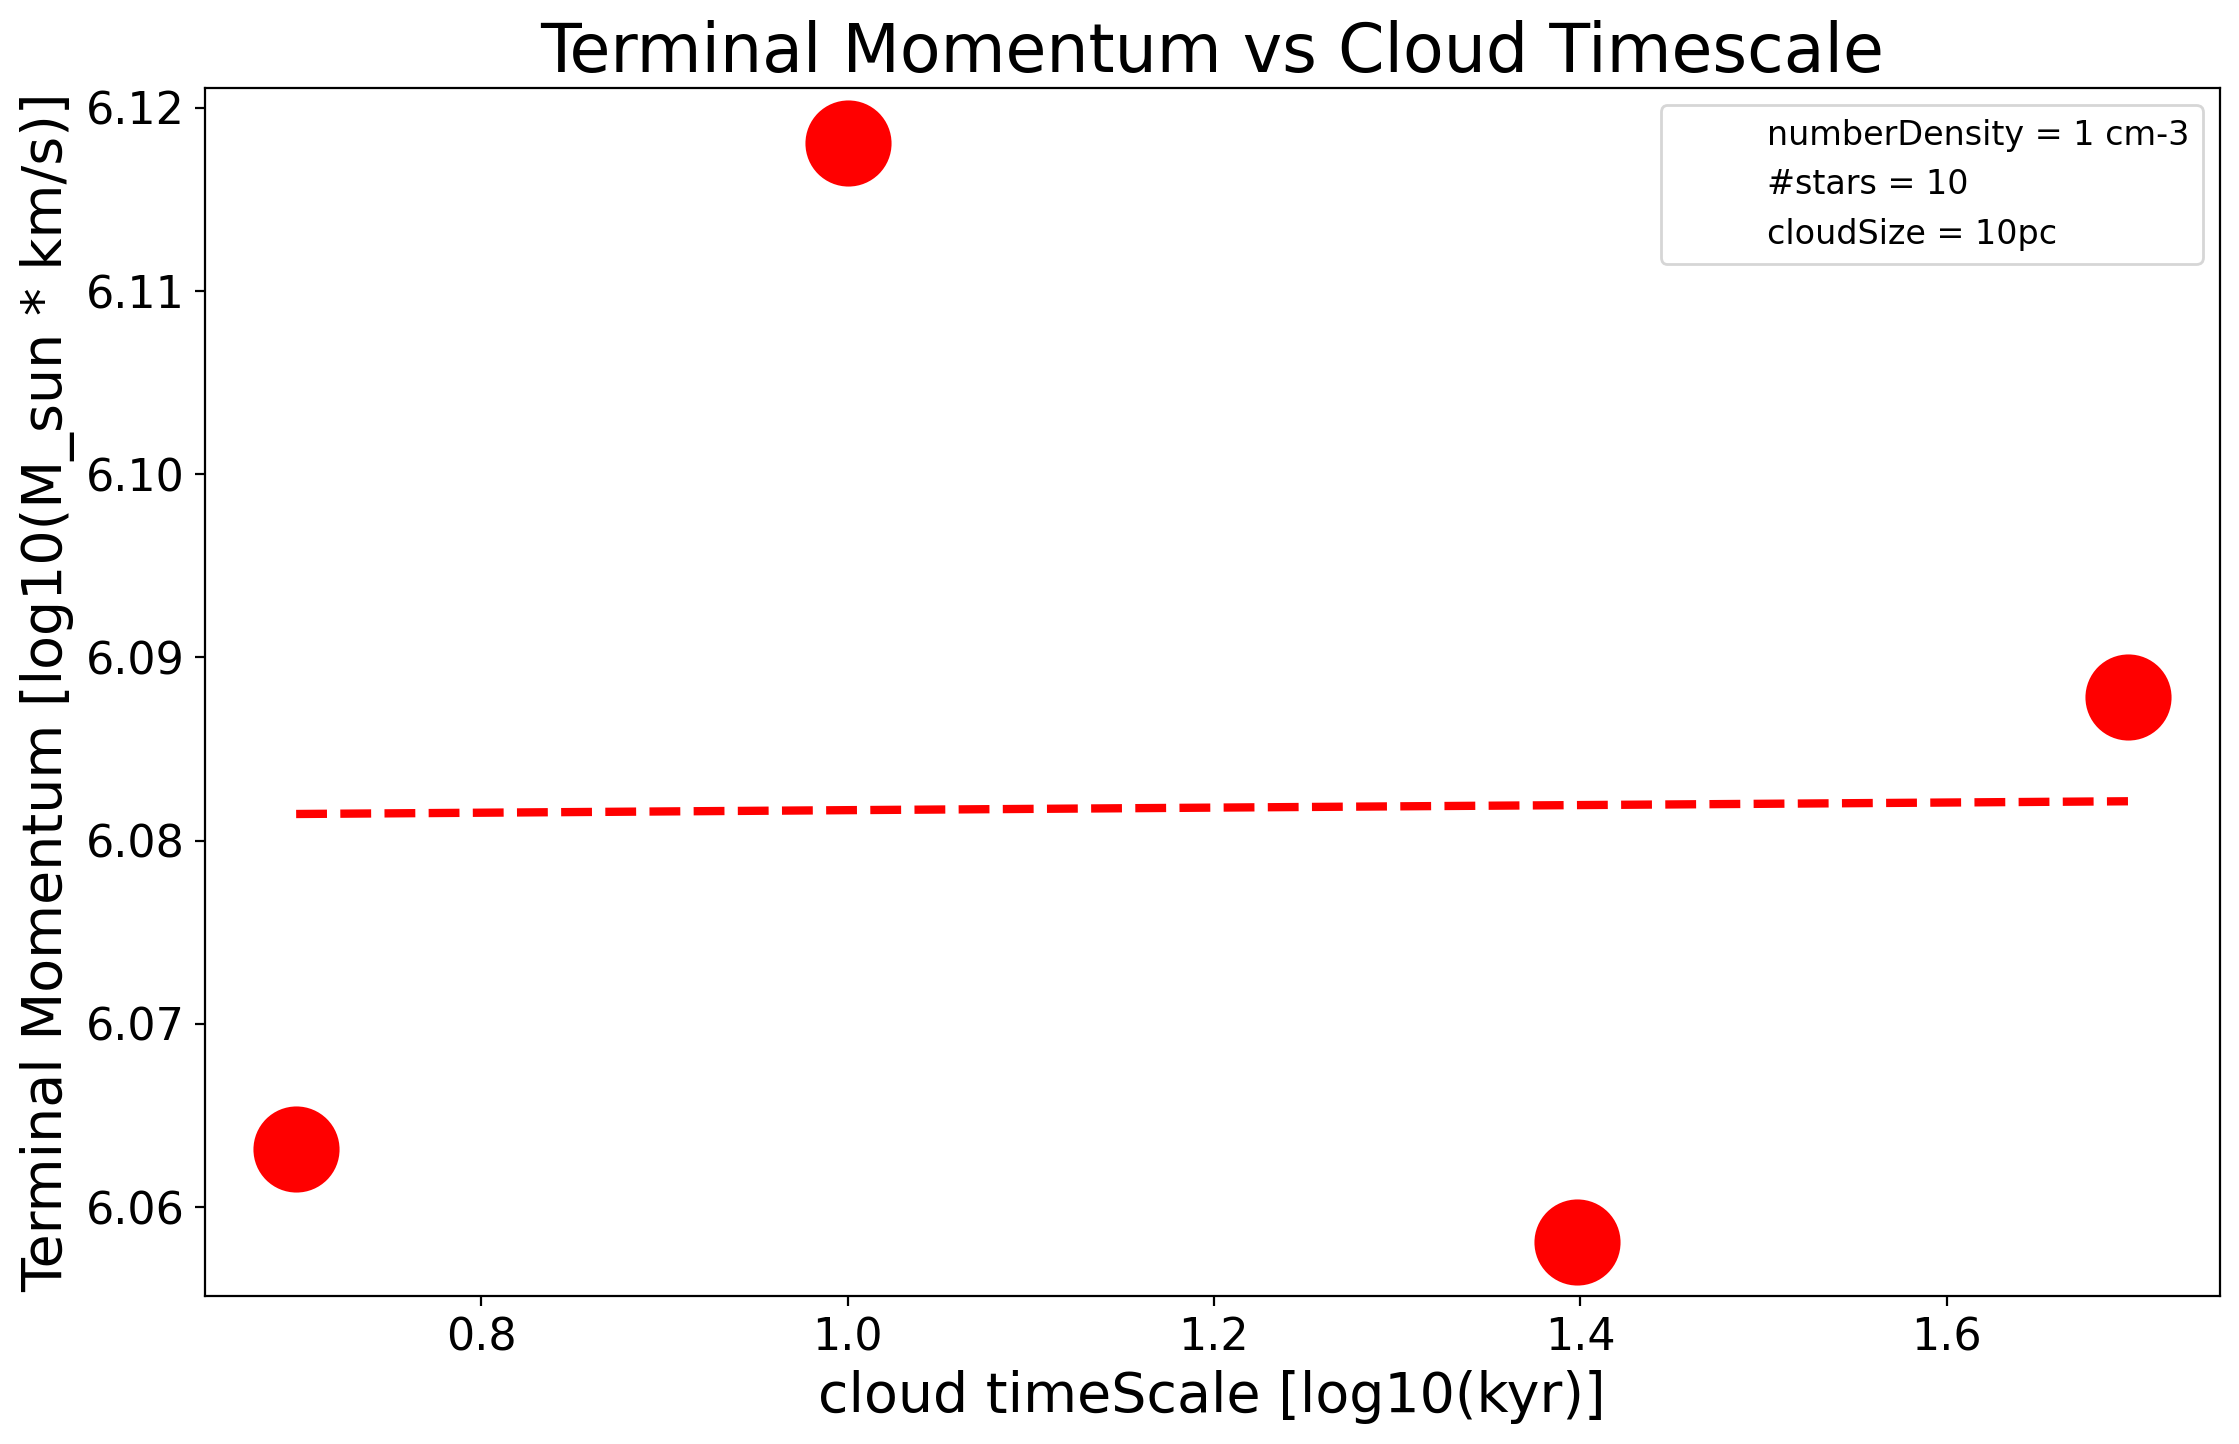

In [12]:
#terminalMomentum = -4224807.140591751 * log(0.026675524983074746 * nStar) + 4446534.69925895
# perform the fit
p0 = (1104807, .106675524983074746, 1406534) # start with values near those we expect
tempRadArrayToFit = np.append(tempRads[1:], baseTempRad)
tempRadTerminalMomentumArrayToFit = np.append(tempRadTerminalMomenta_in_mSun_kms[1:], baseTerminalMomentum_in_mSun_kms)
xValues = np.log10(tempRadArrayToFit)
yValues = np.log10(tempRadTerminalMomentumArrayToFit)
print(xValues)
print(yValues)
fitValues(xValues, yValues, monoLinear, p0)

#plt.scatter(baseNStar, baseTerminalMomentum_in_cgs)
#plt.scatter(nStars, starTerminalMomenta_in_cgs)
plt.scatter(xValues, yValues)

#x = np.linspace(0,100, 30)
#plt.plot(x, 1200807.140591751 * np.log(0.124983074746 * x) + 1100000, color="orange")
#plt.plot(x, 1200807.140591751 * np.log(0.00000124983074746 * x) + 14900000, color="green")

plt.title("Terminal Momentum vs Cloud Timescale")
plt.xlabel("cloud timeScale [log10(kyr)]")
plt.ylabel("Terminal Momentum [log10(M_sun * km/s)]")

plt.style.use('./my_style.mplstyle')

empty_patch0 = mpatches.Patch(color='none', label="numberDensity = 1 cm-3") 
empty_patch1 = mpatches.Patch(color='none', label="#stars = 10")
empty_patch2 = mpatches.Patch(color='none', label="cloudSize = 10pc") 
empty_patch3 = mpatches.Patch(color='none', label="cloudTimescale = 10kyr") 
plt.legend(handles=[empty_patch0, empty_patch1, empty_patch2])

In [31]:
#density
terminalMomentum = 794259.8457729041 * e^(-0.009245879897495304 * density) + 1026306.2521484414

#nStar
terminalMomentum = -4224807.140591751 * log(0.026675524983074746 * nStar) + 4446534.69925895

#rad
terminalMomentum = 623000.4609932655 * e^(-0.1574346249457595 * rad) + 1170831.6614692502

#tempRad
terminalMomentum = 615269.244061057 * e^(-0.1608744950623485 * tempRad) + 1178550.0475671138

make table of parameters
split cells depending on volume
xlog for density (x and y log all plots)
rnuaway star: 1e-3 density
high density: 1e3

multiply exponentials for final function



In [13]:
logBaseTerminalMomentum_in_mSun_kms = np.log10(baseTerminalMomentum_in_mSun_kms)
logBaseNumberdensity_cgs = np.log10(baseNumberdensity_in_cgs)
logBaseNStar = np.log10(baseNStar)
logBaseRad = np.log10(baseRad)
logBaseTempRad = np.log10(baseTempRad)

logNumberdensities_cgs = np.log10(numberdensities_in_cgs)
logDensityTerminalMomenta_in_mSun_kms = np.log10(densityTerminalMomenta_in_mSun_kms)

numberdensityFitValues

xValues = logNumberdensities_cgs
yValues = np.full(len(logNumberdensities_cgs), logBaseNStar)
zValues = logDensityTerminalMomentumArrayToFit


logNStars = np.log10(nStars)
logNStarTerminalMomenta_cgs = np.log10(starTerminalMomenta_in_mSun_kms)

xValues = np.append(xValues ,np.full(len(nStars)+1, baseDensity))
yValues = np.append(yValues,np.log10(nStarArrayToFit))
zValues = np.append(zValues , logNStarTerminalMomentumArrayToFit)

NameError: name 'numberdensityFitValues' is not defined

[-0.12573353  0.28171344  0.02093318  5.90282896]


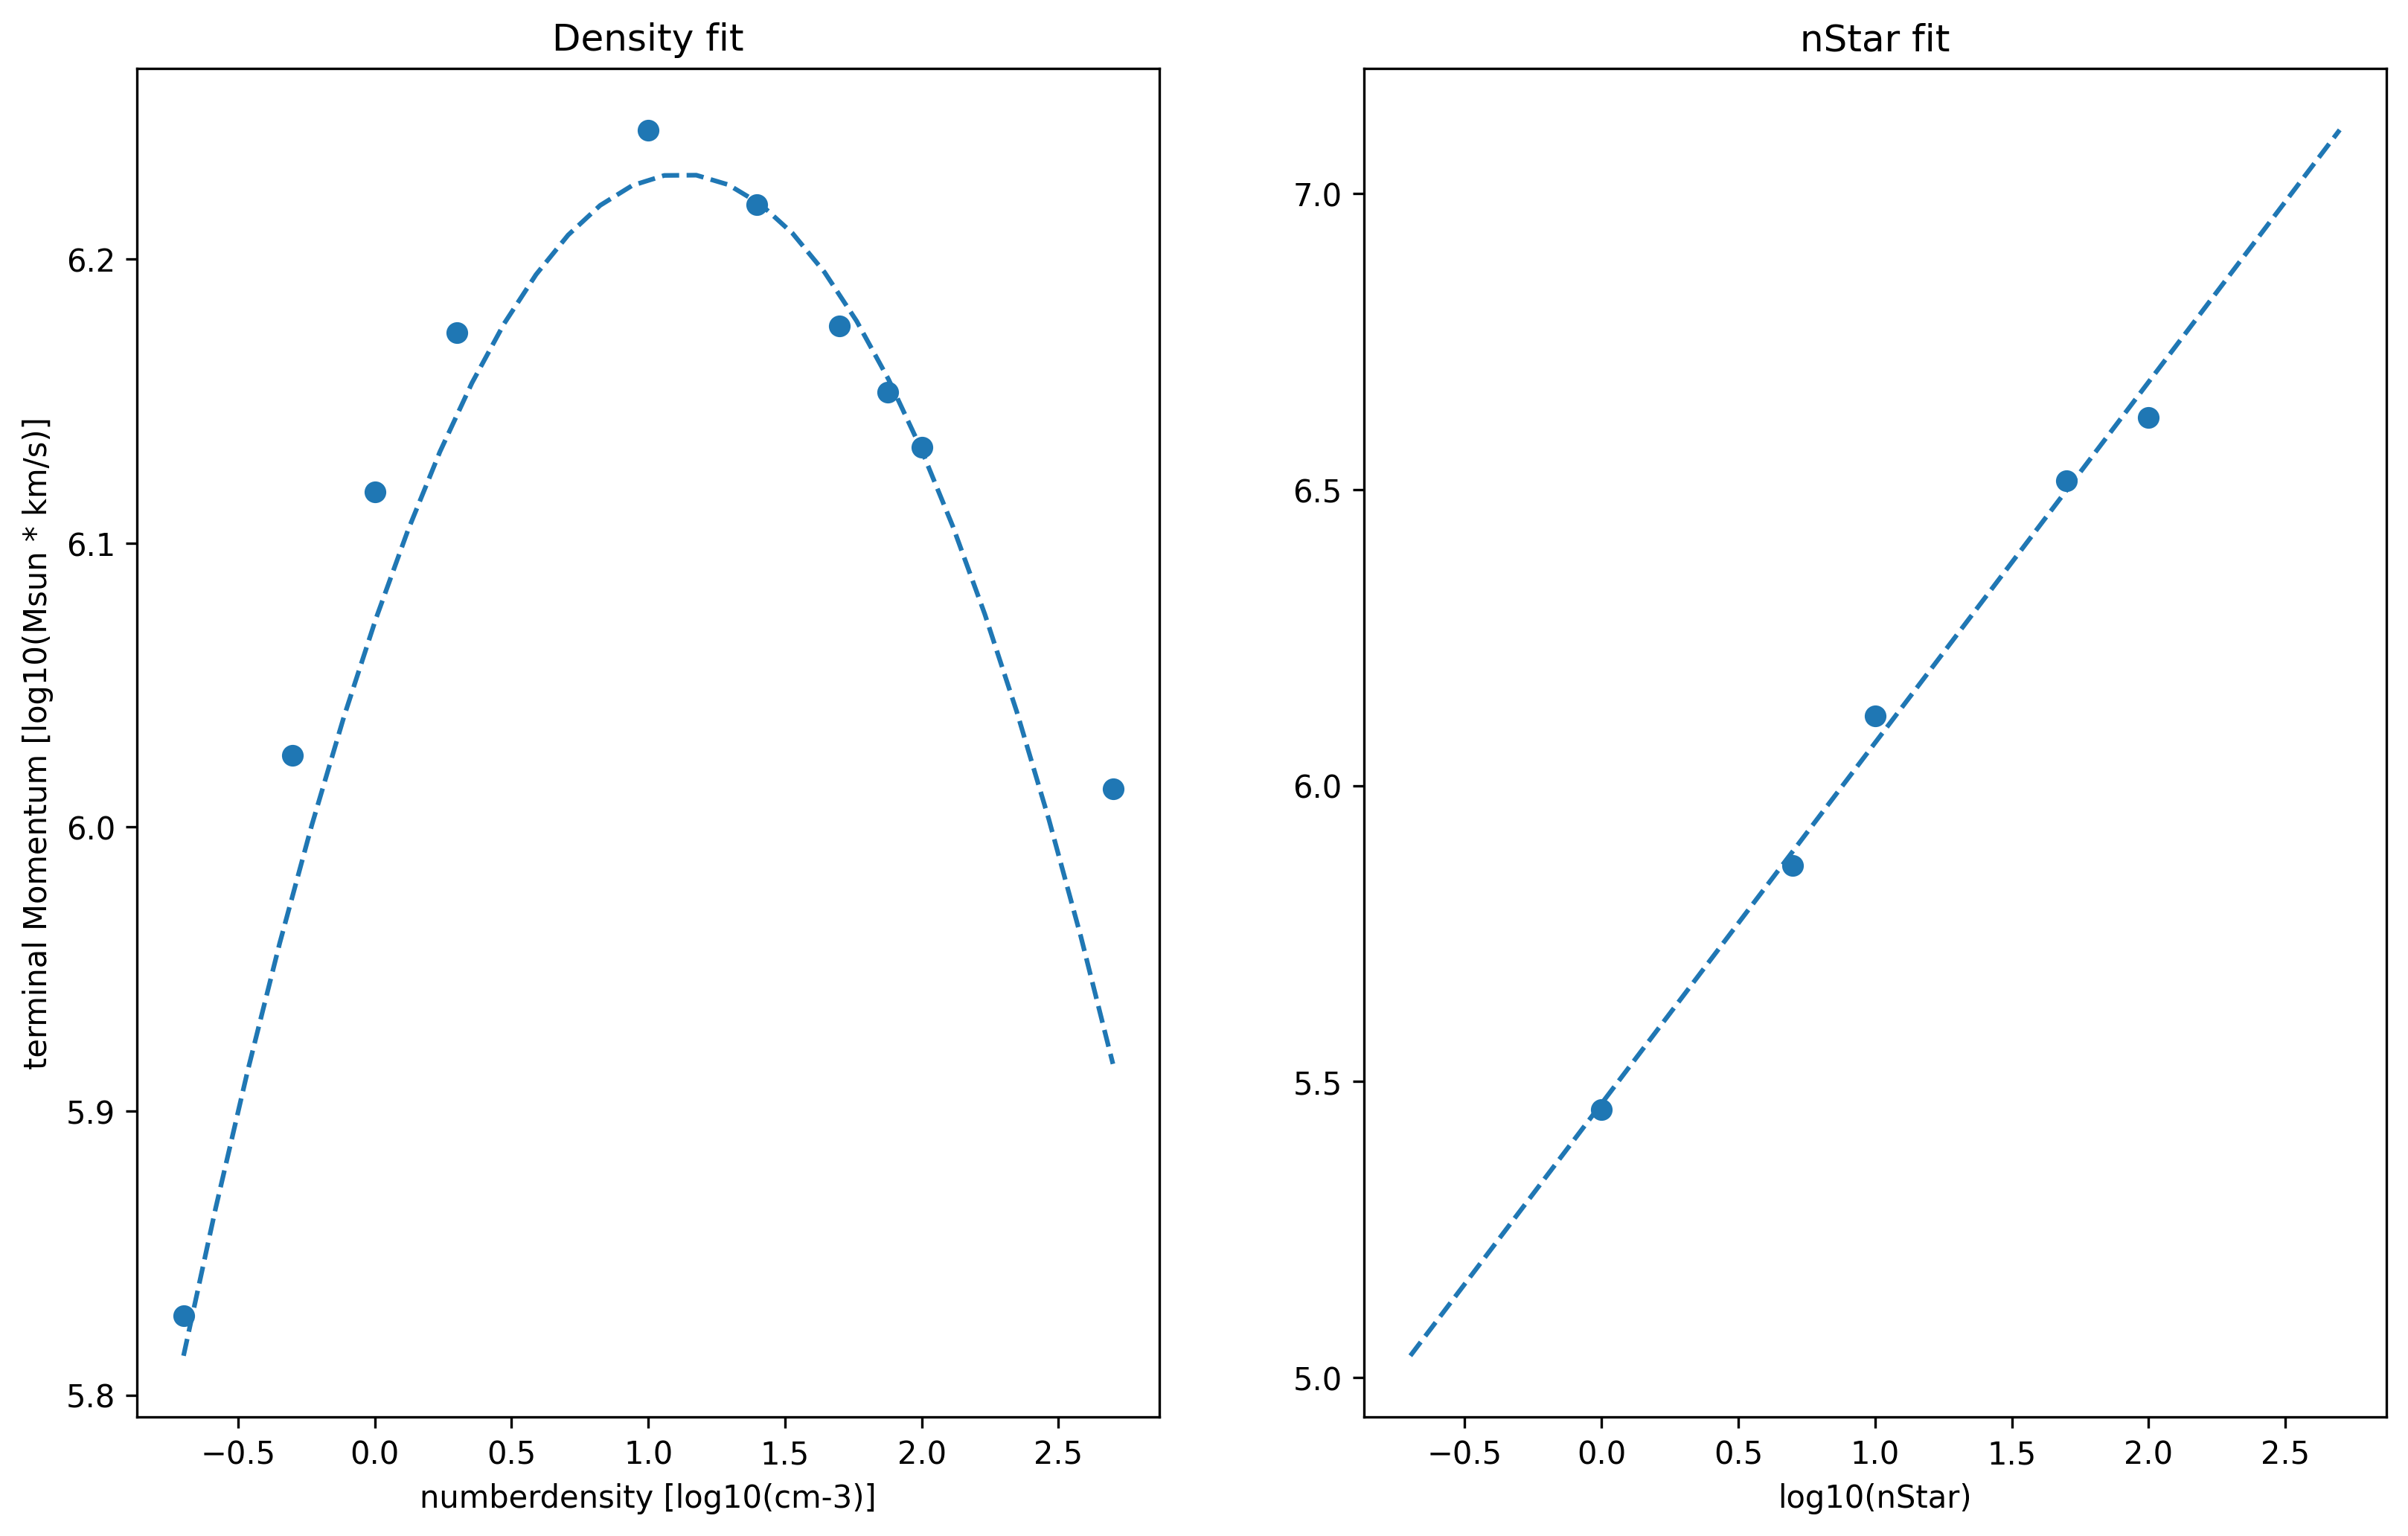

In [19]:
# Define the function to be fitted
def func(X, p1, p2, p3, p4): # x = density, y = nStars
    x,y = X
    return p1*x**2 + p2*x + p3 * y + p4

# Provide an initial guess for the parameters
p0 = [-0.12573353  0.28171344  0.02093318  5.90282896]

# Fit the function to the data
params, _ = scipy.optimize.curve_fit(func, (xValues, yValues), zValues, p0)

print(params)

params = (-0.12573352 , 0.28171343 , 0.6093318 , 5.46282896) # for (a*x**2 + b*x) + m * y + c





plt.subplots(nrows=1, ncols=2, figsize=(13,8), dpi=300)
# Create the first subplot
plt.subplot(1, 2, 1)


x = np.linspace(np.min(xValues), np.max(xValues), 30)
plt.plot(x, func((x,1), params[0], params[1], params[2], params[3]), '--', label="fitted")
plt.scatter(np.log10(densityArrayToFit), np.log10(densityTerminalMomentumArrayToFit))
plt.title('Density fit')
plt.xlabel("numberdensity [log10(cm-3)]")
plt.ylabel("terminal Momentum [log10(Msun * km/s)]")






# Create the second subplot
plt.subplot(1, 2, 2)


x = np.linspace(np.min(xValues), np.max(xValues), 30)
plt.plot(x, func((0,x), params[0], params[1], params[2], params[3]), '--', label="fitted")
plt.scatter(np.log10(nStarArrayToFit), np.log10(nStarTerminalMomentumArrayToFit))
plt.title('nStar fit')
plt.xlabel("log10(nStar)")

# Show the plot
plt.show()
